## PROJECT - Telecom Churn


### OBJECTIVE : 


#### Business Objective: Customer churn is a big problem for telecommunications companies. Indeed, their annual churn rates are usually higher than 10%. For that reason, they develop strategies to keep as many clients as possible. This is a classification project since the variable to be predicted is binary (churn or loyal customer). The goal here is to model churn probability, conditioned on the customer features.

## Import Libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

## Import DATA SET

In [2]:
churn=pd.read_csv("Churn.csv")
churn.head(4)

,Unnamed: 0,state,area.code,account.length,voice.plan,voice.messages,intl.plan,intl.mins,intl.calls,intl.charge,...,day.calls,day.charge,eve.mins,eve.calls,eve.charge,night.mins,night.calls,night.charge,customer.calls,churn
0,1,KS,area_code_415,128,yes,25,no,10.0,3,2.70,...,110,45.07,197.4,99,16.78,244.7,91,11.01,1,no
1,2,OH,area_code_415,107,yes,26,no,13.7,3,3.70,...,123,27.47,195.5,103,16.62,254.4,103,11.45,1,no
2,3,NJ,area_code_415,137,no,0,no,12.2,5,3.29,...,114,41.38,121.2,110,10.30,162.6,104,7.32,0,no
3,4,OH,area_code_408,84,no,0,yes,6.6,7,1.78,...,71,50.9,61.9,88,5.26,196.9,89,8.86,2,no


### Shape

In [3]:
churn.shape

(5000, 21)

### Summary of the dataset

#### INFO

In [4]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      5000 non-null   int64  
 1   state           5000 non-null   object 
 2   area.code       5000 non-null   object 
 3   account.length  5000 non-null   int64  
 4   voice.plan      5000 non-null   object 
 5   voice.messages  5000 non-null   int64  
 6   intl.plan       5000 non-null   object 
 7   intl.mins       5000 non-null   float64
 8   intl.calls      5000 non-null   int64  
 9   intl.charge     5000 non-null   float64
 10  day.mins        5000 non-null   float64
 11  day.calls       5000 non-null   int64  
 12  day.charge      5000 non-null   object 
 13  eve.mins        5000 non-null   object 
 14  eve.calls       5000 non-null   int64  
 15  eve.charge      5000 non-null   float64
 16  night.mins      5000 non-null   float64
 17  night.calls     5000 non-null   i

### Describe

In [5]:
churn.describe()

,Unnamed: 0,account.length,voice.messages,intl.mins,intl.calls,intl.charge,day.mins,day.calls,eve.calls,eve.charge,night.mins,night.calls,night.charge,customer.calls
count,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2500.500000,100.25860,7.755200,10.261780,4.435200,2.771196,180.288900,100.029400,100.191000,17.054322,200.391620,99.919200,9.017732,1.570400
std,1443.520003,39.69456,13.546393,2.761396,2.456788,0.745514,53.894699,19.831197,19.826496,4.296843,50.527789,19.958686,2.273763,1.306363
min,1.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1250.750000,73.00000,0.000000,8.500000,3.000000,2.300000,143.700000,87.000000,87.000000,14.140000,166.900000,87.000000,7.510000,1.000000
50%,2500.500000,100.00000,0.000000,10.300000,4.000000,2.780000,180.100000,100.000000,100.000000,17.090000,200.400000,100.000000,9.020000,1.000000
75%,3750.250000,127.00000,17.000000,12.000000,6.000000,3.240000,216.200000,113.000000,114.000000,19.900000,234.700000,113.000000,10.560000,2.000000
max,5000.000000,243.00000,52.000000,20.000000,20.000000,5.400000,351.500000,165.000000,170.000000,30.910000,395.000000,175.000000,17.770000,9.000000


### Droping "Unnamed" Column

In [6]:
churn=churn.drop('Unnamed: 0',axis=1)
churn

,state,area.code,account.length,voice.plan,voice.messages,intl.plan,intl.mins,intl.calls,intl.charge,day.mins,day.calls,day.charge,eve.mins,eve.calls,eve.charge,night.mins,night.calls,night.charge,customer.calls,churn
0,KS,area_code_415,128,yes,25,no,10.0,3,2.70,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,1,no
1,OH,area_code_415,107,yes,26,no,13.7,3,3.70,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,1,no
2,NJ,area_code_415,137,no,0,no,12.2,5,3.29,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,0,no
3,OH,area_code_408,84,no,0,yes,6.6,7,1.78,299.4,71,50.9,61.9,88,5.26,196.9,89,8.86,2,no
4,OK,area_code_415,75,no,0,yes,10.1,3,2.73,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,3,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,HI,area_code_408,50,yes,40,no,9.9,5,2.67,235.7,127,40.07,223,126,18.96,297.5,116,13.39,2,no
4996,WV,area_code_415,152,no,0,no,14.7,2,3.97,184.2,90,31.31,256.8,73,21.83,213.6,113,9.61,3,yes
4997,DC,area_code_415,61,no,0,no,13.6,4,3.67,140.6,89,23.9,172.8,128,14.69,212.4,97,9.56,1,no
4998,DC,area_code_510,109,no,0,no,8.5,6,2.30,188.8,67,32.1,171.7,92,14.59,224.4,89,10.10,0,no


### Rename all the columns

In [7]:
churn1=churn.rename({"state":"State","area.code":"Area_code","account.length":"Account_length","voice.plan":"Voice_plan","voice.messages":"Voice_messages","intl.plan":"Intl_plan","intl.mins":"Intl_mins","intl.calls":"Intl_calls","intl.charge":"Intl_charge","day.mins":"Day_mins","day.calls":"Day_calls","day.charge":"Day_charge","eve.mins":"Eve_mins","eve.calls":"Eve_calls","eve.charge":"Eve_charge","night.mins":"Night_mins","night.calls":"Night_calls","night.charge":"Night_charge","customer.calls":"Customer_calls","churn":"Churn"},axis=1)
churn1.head()

,State,Area_code,Account_length,Voice_plan,Voice_messages,Intl_plan,Intl_mins,Intl_calls,Intl_charge,Day_mins,Day_calls,Day_charge,Eve_mins,Eve_calls,Eve_charge,Night_mins,Night_calls,Night_charge,Customer_calls,Churn
0,KS,area_code_415,128,yes,25,no,10.0,3,2.70,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,1,no
1,OH,area_code_415,107,yes,26,no,13.7,3,3.70,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,1,no
2,NJ,area_code_415,137,no,0,no,12.2,5,3.29,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,0,no
3,OH,area_code_408,84,no,0,yes,6.6,7,1.78,299.4,71,50.9,61.9,88,5.26,196.9,89,8.86,2,no
4,OK,area_code_415,75,no,0,yes,10.1,3,2.73,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,3,no


In [8]:
churn1["Area_code"].value_counts()

area_code_415    2495
area_code_408    1259
area_code_510    1246
Name: Area_code, dtype: int64

In [9]:
churn1["State"].value_counts()

WV    158
MN    125
AL    124
ID    119
VA    118
OH    116
TX    116
WY    115
NY    114
OR    114
NJ    112
UT    112
WI    106
MI    103
ME    103
MA    103
MD    102
VT    101
MT     99
RI     99
KY     99
MS     99
CT     99
KS     99
WA     98
IN     98
CO     96
NH     95
DE     94
MO     93
AR     92
NM     91
NC     91
SC     91
FL     90
NV     90
OK     90
TN     89
AZ     89
DC     88
IL     88
NE     88
ND     88
HI     86
SD     85
GA     83
LA     82
PA     77
AK     72
IA     69
CA     52
Name: State, dtype: int64

In [10]:
churn1["State"].value_counts().info()

<class 'pandas.core.series.Series'>
Index: 51 entries, WV to CA
Series name: State
Non-Null Count  Dtype
--------------  -----
51 non-null     int64
dtypes: int64(1)
memory usage: 816.0+ bytes


### To Find Duplicates

In [11]:
churn1[churn1.duplicated()]

,State,Area_code,Account_length,Voice_plan,Voice_messages,Intl_plan,Intl_mins,Intl_calls,Intl_charge,Day_mins,Day_calls,Day_charge,Eve_mins,Eve_calls,Eve_charge,Night_mins,Night_calls,Night_charge,Customer_calls,Churn


#### There are no Duplicated values

# Feature Engineering

## Change Categorical values to numerical value


### Label encoding for boolean datatype columns

In [12]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
churn1["Voice_plan"]=LE.fit_transform(churn1["Voice_plan"])
churn1["Intl_plan"]=LE.fit_transform(churn1["Intl_plan"])
churn1["Churn"]=LE.fit_transform(churn1["Churn"])

In [13]:
churn1["Day_charge"].value_counts()

26.18    10
32.18    10
30.11     9
31.37     9
27.12     9
         ..
12.04     1
43.93     1
44.22     1
47.82     1
28.9      1
Name: Day_charge, Length: 1962, dtype: int64

### Change columns 'state' and 'area.code' to numerical values

#### State

In [14]:
churn1["State"][churn1["State"]=="WV"]=0
churn1["State"][churn1["State"]=="MN"]=1
churn1["State"][churn1["State"]=="AL"]=2
churn1["State"][churn1["State"]=="ID"]=3
churn1["State"][churn1["State"]=="VA"]=4
churn1["State"][churn1["State"]=="OH"]=5
churn1["State"][churn1["State"]=="TX"]=6
churn1["State"][churn1["State"]=="WY"]=7
churn1["State"][churn1["State"]=="NY"]=8
churn1["State"][churn1["State"]=="OR"]=9
churn1["State"][churn1["State"]=="NJ"]=10
churn1["State"][churn1["State"]=="UT"]=11
churn1["State"][churn1["State"]=="WI"]=12
churn1["State"][churn1["State"]=="MI"]=13
churn1["State"][churn1["State"]=="ME"]=14
churn1["State"][churn1["State"]=="MA"]=15
churn1["State"][churn1["State"]=="MD"]=16
churn1["State"][churn1["State"]=="VT"]=17
churn1["State"][churn1["State"]=="MT"]=18
churn1["State"][churn1["State"]=="RI"]=19
churn1["State"][churn1["State"]=="KY"]=20
churn1["State"][churn1["State"]=="MS"]=21
churn1["State"][churn1["State"]=="CT"]=22
churn1["State"][churn1["State"]=="KS"]=23
churn1["State"][churn1["State"]=="WA"]=24
churn1["State"][churn1["State"]=="IN"]=25
churn1["State"][churn1["State"]=="CO"]=26
churn1["State"][churn1["State"]=="NH"]=27
churn1["State"][churn1["State"]=="DE"]=28
churn1["State"][churn1["State"]=="MO"]=29
churn1["State"][churn1["State"]=="AR"]=30
churn1["State"][churn1["State"]=="NM"]=31
churn1["State"][churn1["State"]=="NC"]=32
churn1["State"][churn1["State"]=="SC"]=33
churn1["State"][churn1["State"]=="FL"]=34
churn1["State"][churn1["State"]=="NV"]=35
churn1["State"][churn1["State"]=="OK"]=36
churn1["State"][churn1["State"]=="TN"]=37
churn1["State"][churn1["State"]=="AZ"]=38
churn1["State"][churn1["State"]=="DC"]=39
churn1["State"][churn1["State"]=="IL"]=40
churn1["State"][churn1["State"]=="NE"]=41
churn1["State"][churn1["State"]=="ND"]=42
churn1["State"][churn1["State"]=="HI"]=43
churn1["State"][churn1["State"]=="SD"]=44
churn1["State"][churn1["State"]=="GA"]=45
churn1["State"][churn1["State"]=="LA"]=46
churn1["State"][churn1["State"]=="PA"]=47
churn1["State"][churn1["State"]=="AK"]=48
churn1["State"][churn1["State"]=="IA"]=49
churn1["State"][churn1["State"]=="CA"]=50

churn1["State"].value_counts()

0     158
1     125
2     124
3     119
4     118
5     116
6     116
7     115
8     114
9     114
10    112
11    112
12    106
13    103
14    103
15    103
16    102
17    101
18     99
19     99
20     99
21     99
22     99
23     99
24     98
25     98
26     96
27     95
28     94
29     93
30     92
31     91
32     91
33     91
34     90
35     90
36     90
37     89
38     89
39     88
40     88
41     88
42     88
43     86
44     85
45     83
46     82
47     77
48     72
49     69
50     52
Name: State, dtype: int64

#### Area_code

In [15]:
churn1["Area_code"][churn1["Area_code"]=="area_code_408"]=0
churn1["Area_code"][churn1["Area_code"]=="area_code_415"]=1
churn1["Area_code"][churn1["Area_code"]=="area_code_510"]=2

churn1["Area_code"].value_counts()

1    2495
0    1259
2    1246
Name: Area_code, dtype: int64

#### Day_charge

In [16]:
churn1["Day_charge"].astype

<bound method NDFrame.astype of 0       45.07
1       27.47
2       41.38
3        50.9
4       28.34
        ...  
4995    40.07
4996    31.31
4997     23.9
4998     32.1
4999       22
Name: Day_charge, Length: 5000, dtype: object>

In [17]:
churn1["Day_charge"]=churn1["Day_charge"].fillna(0).astype(float)

In [18]:
churn1["Day_charge"]=churn1["Day_charge"].fillna(0).astype(int)

In [19]:
churn1["Day_charge"].astype

<bound method NDFrame.astype of 0       45
1       27
2       41
3       50
4       28
        ..
4995    40
4996    31
4997    23
4998    32
4999    22
Name: Day_charge, Length: 5000, dtype: int32>

#### Eve_mins

In [20]:
churn1["Eve_mins"].astype

<bound method NDFrame.astype of 0       197.4
1       195.5
2       121.2
3        61.9
4       148.3
        ...  
4995      223
4996    256.8
4997    172.8
4998    171.7
4999    267.1
Name: Eve_mins, Length: 5000, dtype: object>

In [21]:
churn1["Eve_mins"]=churn1["Eve_mins"].fillna(0).astype(float)

In [22]:
churn1["Eve_mins"]=churn1["Eve_mins"].fillna(0).astype(int)

In [23]:
churn1["Eve_mins"].astype

<bound method NDFrame.astype of 0       197
1       195
2       121
3        61
4       148
       ... 
4995    223
4996    256
4997    172
4998    171
4999    267
Name: Eve_mins, Length: 5000, dtype: int32>

## Correlation using Heatmap

In [24]:
corr=churn1.corr()
corr

,Account_length,Voice_plan,Voice_messages,Intl_plan,Intl_mins,Intl_calls,Intl_charge,Day_mins,Day_calls,Day_charge,Eve_mins,Eve_calls,Eve_charge,Night_mins,Night_calls,Night_charge,Customer_calls,Churn
Account_length,1.000000,-0.006650,-0.014575,0.014681,0.001291,0.014277,0.001292,-0.001017,0.028240,-0.001312,-0.013641,0.009143,-0.009587,0.000668,-0.007825,0.000656,-0.001445,0.021203
Voice_plan,-0.006650,1.000000,0.954508,0.009054,0.004116,-0.007525,0.004165,0.002059,-0.001735,0.005588,0.019279,-0.005916,0.023332,0.005524,0.009176,0.005522,-0.014453,-0.110698
Voice_messages,-0.014575,0.954508,1.000000,0.011947,0.002463,0.000124,0.002505,0.005381,0.000883,0.008870,0.015044,-0.003954,0.019496,0.005541,0.002676,0.005535,-0.007086,-0.097633
Intl_plan,0.014681,0.009054,0.011947,1.000000,0.031799,0.004493,0.031751,0.028138,0.008102,0.029092,0.017139,0.002505,0.021234,-0.026508,0.005623,-0.026510,-0.012974,0.259123
Intl_mins,0.001291,0.004116,0.002463,0.031799,1.000000,0.016791,0.999993,-0.019486,0.013097,-0.020444,0.004377,-0.007458,0.000132,-0.006721,0.000391,-0.006717,-0.012122,0.063285
Intl_calls,0.014277,-0.007525,0.000124,0.004493,0.016791,1.000000,0.016900,-0.001303,0.010893,-0.000562,0.003018,0.005574,0.008393,-0.017214,-0.000156,-0.017182,-0.019147,-0.046893
Intl_charge,0.001292,0.004165,0.002505,0.031751,0.999993,0.016900,1.000000,-0.019415,0.013161,-0.020375,0.004414,-0.007507,0.000155,-0.006655,0.000368,-0.006650,-0.012180,0.063275
Day_mins,-0.001017,0.002059,0.005381,0.028138,-0.019486,-0.001303,-0.019415,1.000000,0.001935,0.993158,-0.010936,0.008128,-0.010760,0.011799,0.004236,0.011783,0.002733,0.207705
Day_calls,0.028240,-0.001735,0.000883,0.008102,0.013097,0.010893,0.013161,0.001935,1.000000,0.003001,-0.004041,0.003754,-0.000695,0.002804,-0.008308,0.002802,-0.010739,0.016130
Day_charge,-0.001312,0.005588,0.008870,0.029092,-0.020444,-0.000562,-0.020375,0.993158,0.003001,1.000000,-0.008936,0.008654,-0.008494,0.013112,0.004311,0.013095,0.004156,0.208530


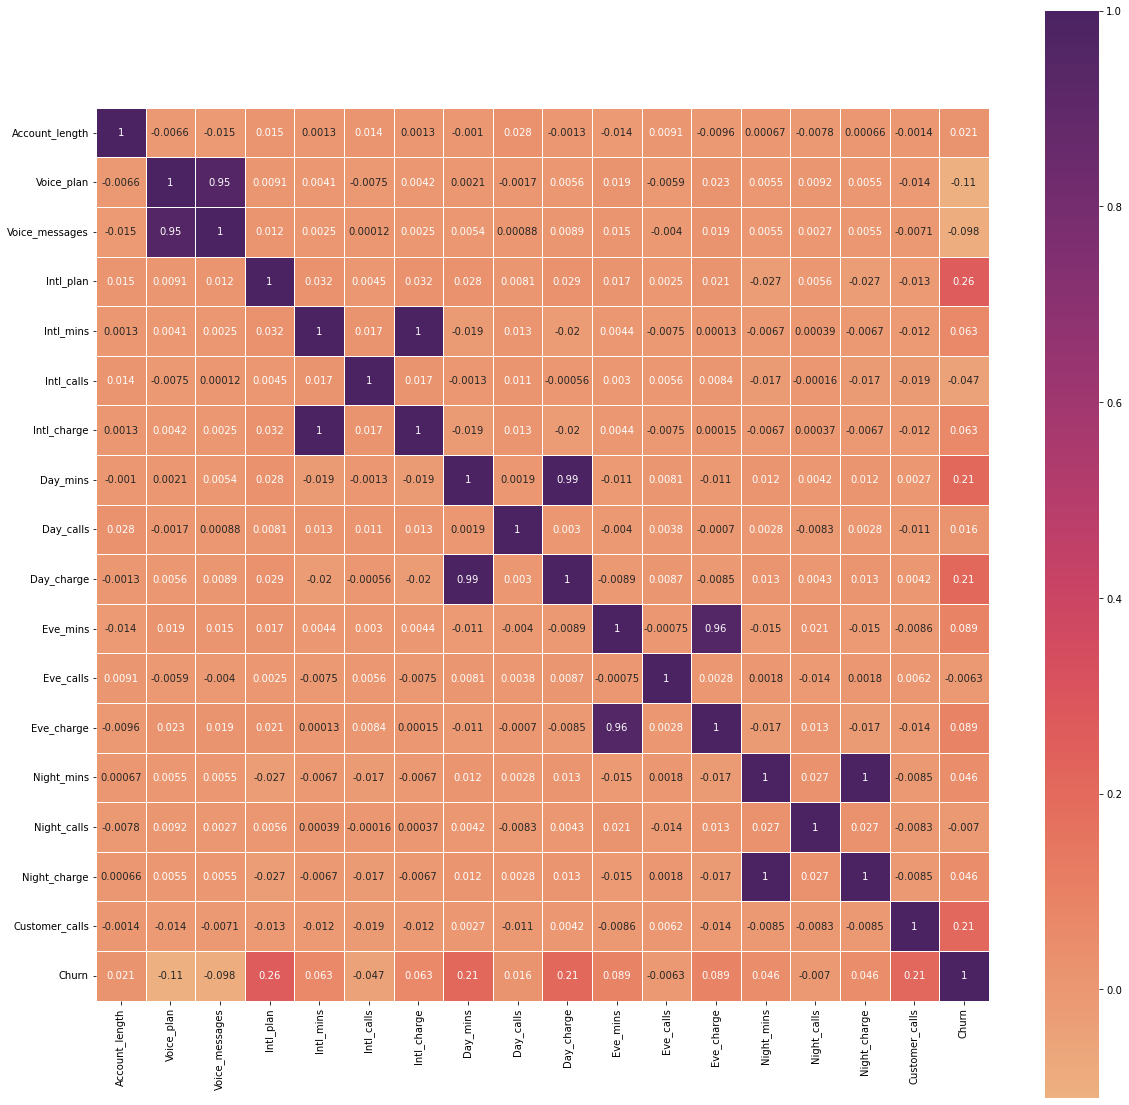

In [25]:
plt.figure(figsize=(20,20))
sns.heatmap(data=corr, linewidth=.5, annot=True, square=True, cmap="flare")
plt.show()

## Droping unwanted columns 

In [26]:
churn1=churn1.drop("State",axis=1)
churn1=churn1.drop("Area_code",axis=1)
churn1=churn1.drop("Voice_plan",axis=1)
churn1=churn1.drop("Voice_messages",axis=1)

churn1

,Account_length,Intl_plan,Intl_mins,Intl_calls,Intl_charge,Day_mins,Day_calls,Day_charge,Eve_mins,Eve_calls,Eve_charge,Night_mins,Night_calls,Night_charge,Customer_calls,Churn
0,128,0,10.0,3,2.70,265.1,110,45,197,99,16.78,244.7,91,11.01,1,0
1,107,0,13.7,3,3.70,161.6,123,27,195,103,16.62,254.4,103,11.45,1,0
2,137,0,12.2,5,3.29,243.4,114,41,121,110,10.30,162.6,104,7.32,0,0
3,84,1,6.6,7,1.78,299.4,71,50,61,88,5.26,196.9,89,8.86,2,0
4,75,1,10.1,3,2.73,166.7,113,28,148,122,12.61,186.9,121,8.41,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,50,0,9.9,5,2.67,235.7,127,40,223,126,18.96,297.5,116,13.39,2,0
4996,152,0,14.7,2,3.97,184.2,90,31,256,73,21.83,213.6,113,9.61,3,1
4997,61,0,13.6,4,3.67,140.6,89,23,172,128,14.69,212.4,97,9.56,1,0
4998,109,0,8.5,6,2.30,188.8,67,32,171,92,14.59,224.4,89,10.10,0,0


In [27]:
churn1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Account_length  5000 non-null   int64  
 1   Intl_plan       5000 non-null   int32  
 2   Intl_mins       5000 non-null   float64
 3   Intl_calls      5000 non-null   int64  
 4   Intl_charge     5000 non-null   float64
 5   Day_mins        5000 non-null   float64
 6   Day_calls       5000 non-null   int64  
 7   Day_charge      5000 non-null   int32  
 8   Eve_mins        5000 non-null   int32  
 9   Eve_calls       5000 non-null   int64  
 10  Eve_charge      5000 non-null   float64
 11  Night_mins      5000 non-null   float64
 12  Night_calls     5000 non-null   int64  
 13  Night_charge    5000 non-null   float64
 14  Customer_calls  5000 non-null   int64  
 15  Churn           5000 non-null   int32  
dtypes: float64(6), int32(4), int64(6)
memory usage: 547.0 KB


## Find the outliers of dataset

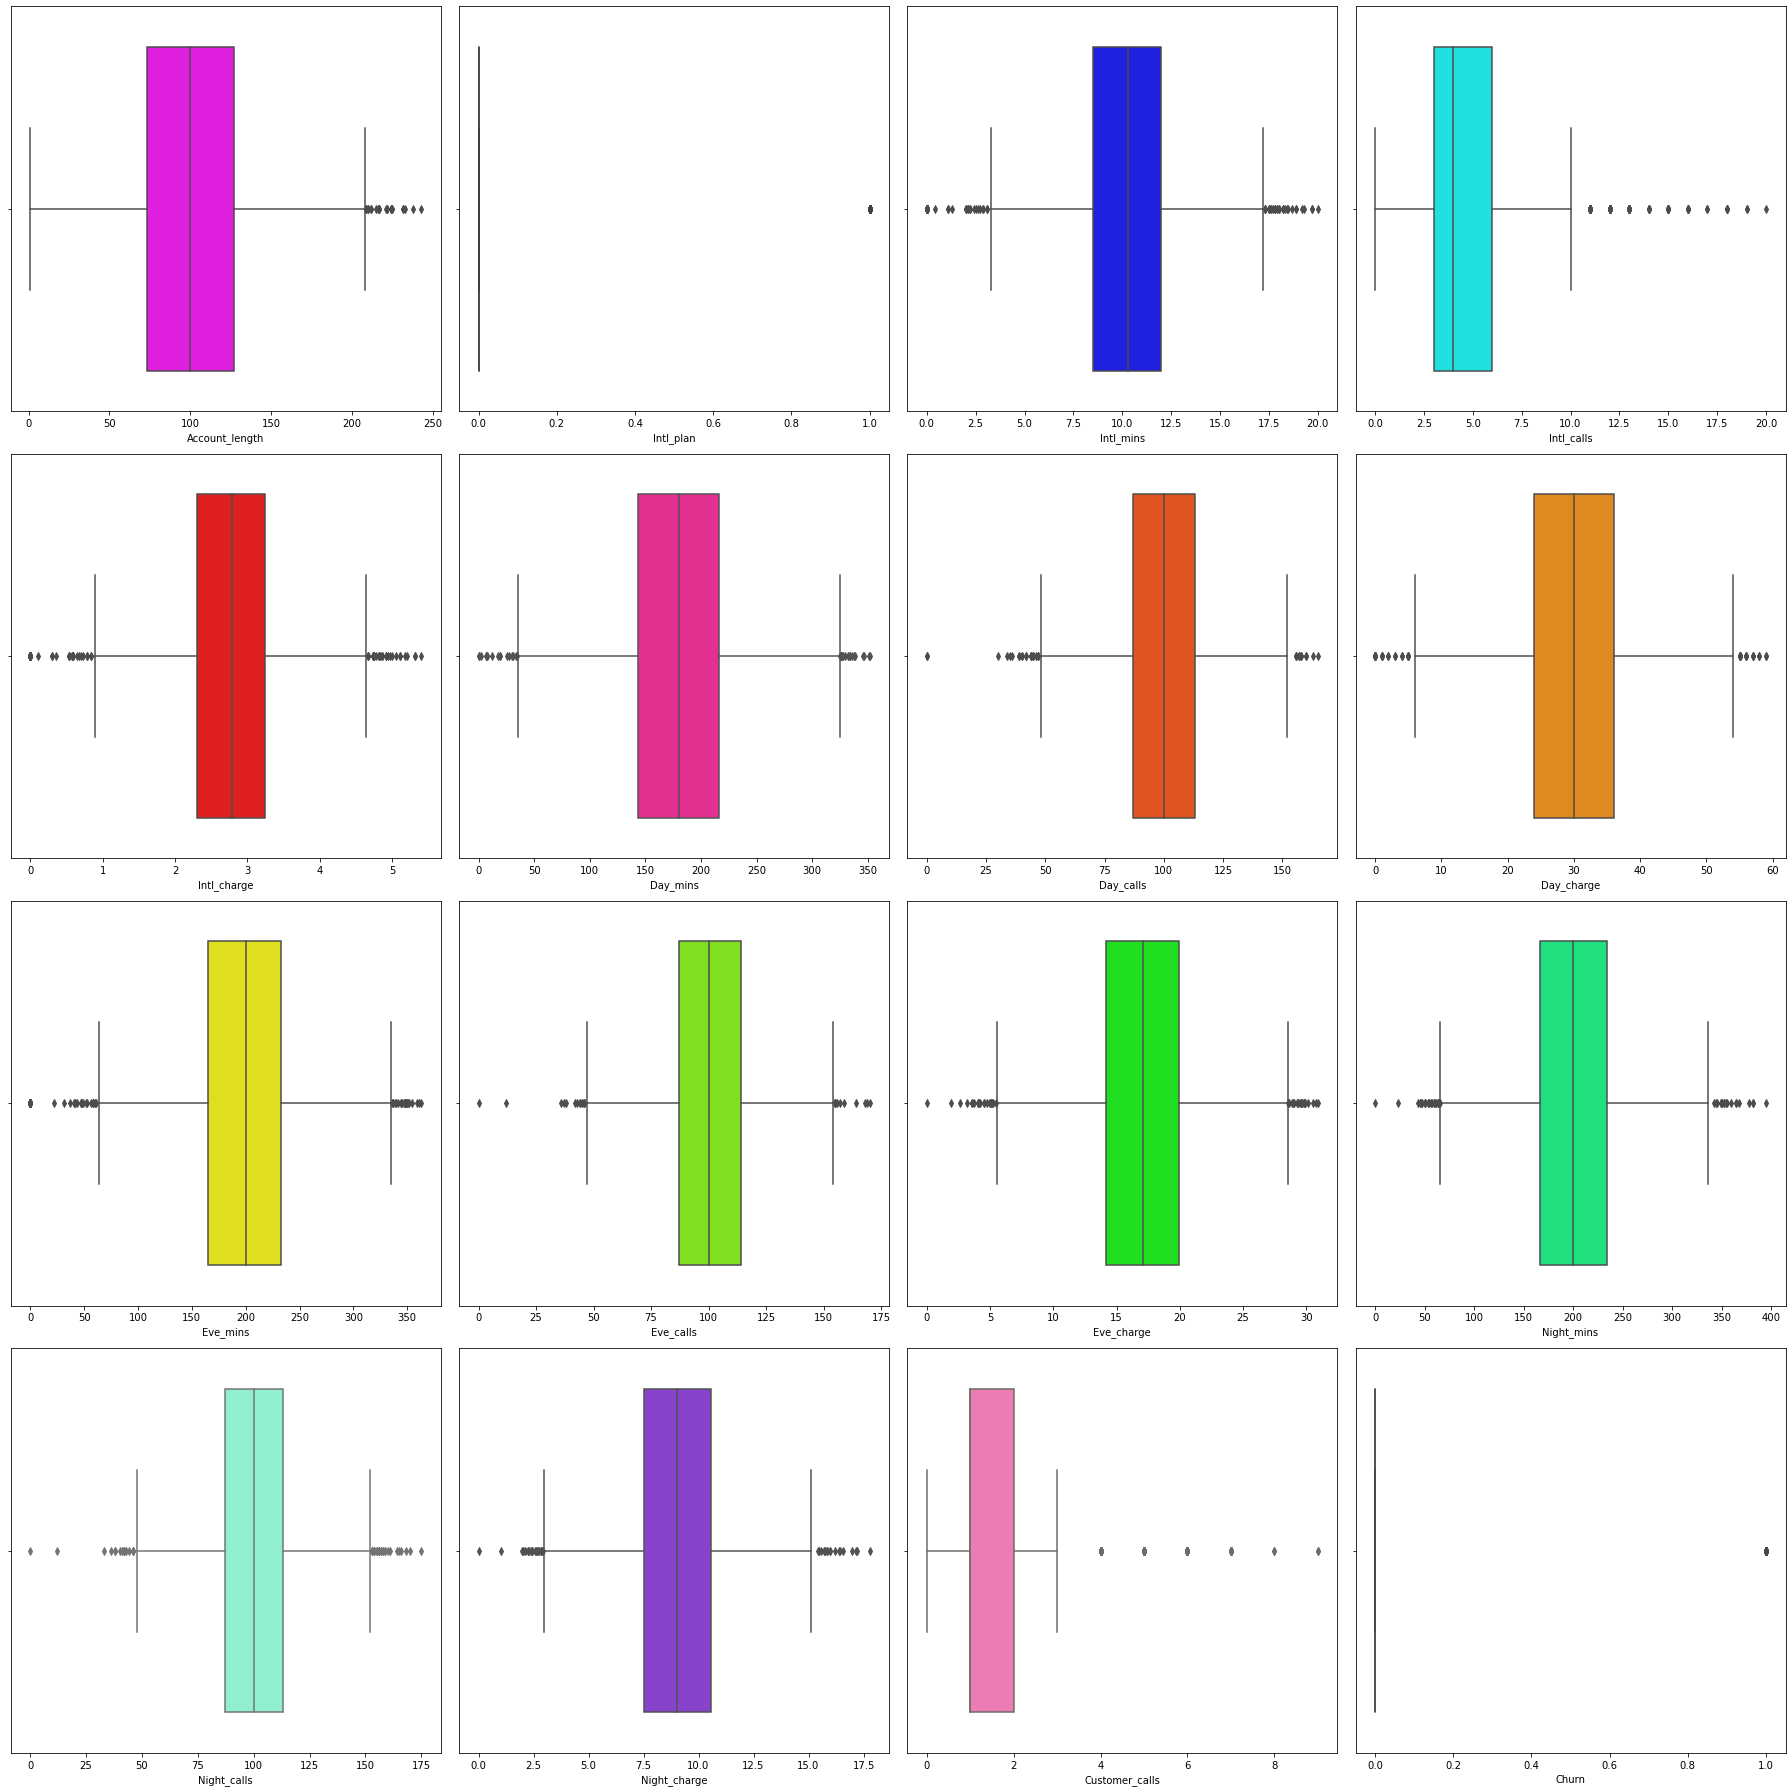

In [28]:
fig, ax = plt.subplots(4,4 ,figsize=(25,25))

sns.boxplot(churn1["Account_length"], ax=ax[0,0], color="magenta")
sns.boxplot(churn1["Intl_plan"], ax=ax[0,1], color="darkviolet")
sns.boxplot(churn1["Intl_mins"], ax=ax[0,2], color="blue")
sns.boxplot(churn1["Intl_calls"], ax=ax[0,3], color="cyan")
sns.boxplot(churn1["Intl_charge"], ax=ax[1,0], color="red")
sns.boxplot(churn1["Day_mins"], ax=ax[1,1], color="deeppink")
sns.boxplot(churn1["Day_calls"], ax=ax[1,2], color="orangered")
sns.boxplot(churn1["Day_charge"], ax=ax[1,3], color="darkorange")
sns.boxplot(churn1["Eve_mins"], ax=ax[2,0], color="yellow")
sns.boxplot(churn1["Eve_calls"], ax=ax[2,1], color="chartreuse")
sns.boxplot(churn1["Eve_charge"], ax=ax[2,2], color="lime")
sns.boxplot(churn1["Night_mins"], ax=ax[2,3], color="springgreen")
sns.boxplot(churn1["Night_calls"], ax=ax[3,0], color="aquamarine")
sns.boxplot(churn1["Night_charge"], ax=ax[3,1], color="blueviolet")
sns.boxplot(churn1["Customer_calls"], ax=ax[3,2], color="hotpink")
sns.boxplot(churn1["Churn"], ax=ax[3,3], color="crimson")

plt.tight_layout()
plt.show()

## Removing the outliers of each columns

#### Account_length

<AxesSubplot:>

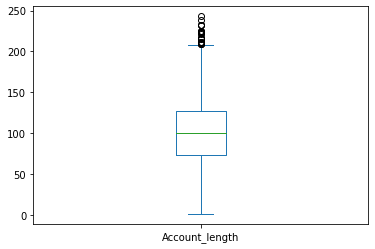

In [29]:
churn1["Account_length"].plot(kind="box")

In [30]:
churn1["Account_length"].value_counts()

90     65
87     59
105    57
93     57
112    56
       ..
215     1
238     1
216     1
208     1
233     1
Name: Account_length, Length: 218, dtype: int64

In [31]:
churn1=churn1[(churn1["Account_length"]!=208) & (churn1["Account_length"]!=215) & (churn1["Account_length"]!=216) & (churn1["Account_length"]!=233) & (churn1["Account_length"]!=238)]
churn1

,Account_length,Intl_plan,Intl_mins,Intl_calls,Intl_charge,Day_mins,Day_calls,Day_charge,Eve_mins,Eve_calls,Eve_charge,Night_mins,Night_calls,Night_charge,Customer_calls,Churn
0,128,0,10.0,3,2.70,265.1,110,45,197,99,16.78,244.7,91,11.01,1,0
1,107,0,13.7,3,3.70,161.6,123,27,195,103,16.62,254.4,103,11.45,1,0
2,137,0,12.2,5,3.29,243.4,114,41,121,110,10.30,162.6,104,7.32,0,0
3,84,1,6.6,7,1.78,299.4,71,50,61,88,5.26,196.9,89,8.86,2,0
4,75,1,10.1,3,2.73,166.7,113,28,148,122,12.61,186.9,121,8.41,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,50,0,9.9,5,2.67,235.7,127,40,223,126,18.96,297.5,116,13.39,2,0
4996,152,0,14.7,2,3.97,184.2,90,31,256,73,21.83,213.6,113,9.61,3,1
4997,61,0,13.6,4,3.67,140.6,89,23,172,128,14.69,212.4,97,9.56,1,0
4998,109,0,8.5,6,2.30,188.8,67,32,171,92,14.59,224.4,89,10.10,0,0


<AxesSubplot:>

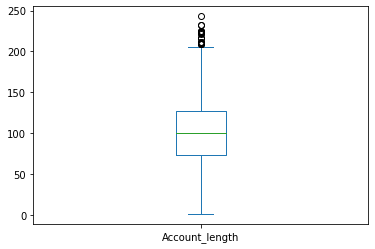

In [32]:
churn1["Account_length"].plot(kind="box")

### Intl_plan

<AxesSubplot:>

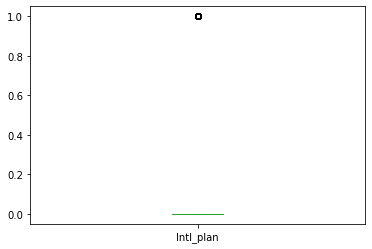

In [33]:
churn1["Intl_plan"].plot(kind="box")

In [34]:
churn1["Intl_plan"].value_counts()

0    4522
1     473
Name: Intl_plan, dtype: int64

### Intl_mins

<AxesSubplot:>

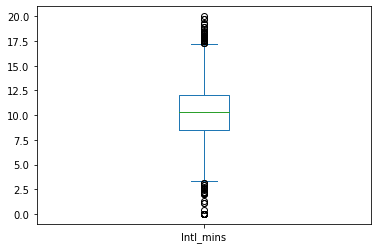

In [35]:
churn1["Intl_mins"].plot(kind="box")

In [36]:
churn1["Intl_mins"].value_counts()

11.1    90
9.8     87
11.3    83
11.4    81
10.1    81
        ..
17.9     1
17.1     1
2.7      1
1.3      1
17.7     1
Name: Intl_mins, Length: 170, dtype: int64

In [37]:
churn1=churn1[(churn1["Intl_mins"]!=1.3)&(churn1["Intl_mins"]!=2.7)&(churn1["Intl_mins"]!=17.1)&(churn1["Intl_mins"]!=17.7)&(churn1["Intl_mins"]!=17.9)]

<AxesSubplot:>

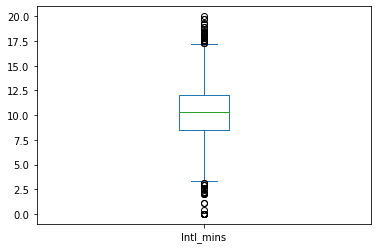

In [38]:
churn1["Intl_mins"].plot(kind="box")

### Intl_calls

<AxesSubplot:>

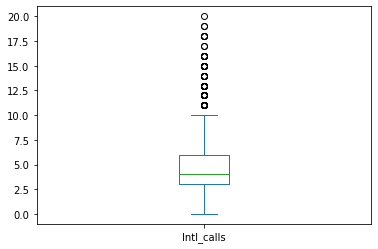

In [39]:
churn1["Intl_calls"].plot(kind="box")

In [40]:
churn1["Intl_calls"].value_counts()

3     991
4     950
2     743
5     706
6     492
7     308
1     264
8     171
9     147
10     76
11     45
0      24
12     23
13     19
15      9
16      7
14      6
18      4
19      2
17      2
20      1
Name: Intl_calls, dtype: int64

### Intl_charge

<AxesSubplot:>

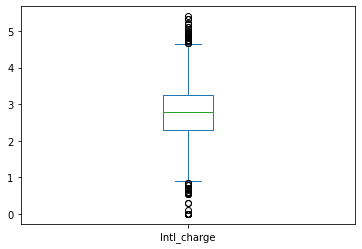

In [41]:
churn1["Intl_charge"].plot(kind="box")

In [42]:
churn1["Intl_charge"].value_counts()

3.00    90
2.65    87
3.05    83
2.73    81
3.08    81
        ..
5.05     1
0.11     1
5.21     1
5.18     1
5.00     1
Name: Intl_charge, Length: 165, dtype: int64

In [43]:
churn1=churn1[(churn1["Intl_charge"]!=0.11) & (churn1["Intl_charge"]!=5.00) & (churn1["Intl_charge"]!=5.05) & (churn1["Intl_charge"]!=5.18) & (churn1["Intl_charge"]!=5.21)]

<AxesSubplot:>

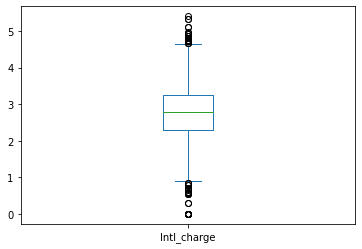

In [44]:
churn1["Intl_charge"].plot(kind="box")

### Day_mins

<AxesSubplot:>

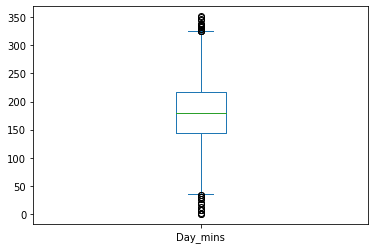

In [45]:
churn1["Day_mins"].plot(kind="box")

In [46]:
churn1["Day_mins"].value_counts()

189.3    10
154.0    10
174.5     9
159.5     9
177.1     9
         ..
70.8      1
258.4     1
260.1     1
281.3     1
170.0     1
Name: Day_mins, Length: 1959, dtype: int64

In [47]:
churn1=churn1[(churn1["Day_mins"]!=70.8) & (churn1["Day_mins"]!=170.0) & (churn1["Day_mins"]!=258.4) & (churn1["Day_mins"]!=260.1) & (churn1["Day_mins"]!=281.3)]

<AxesSubplot:>

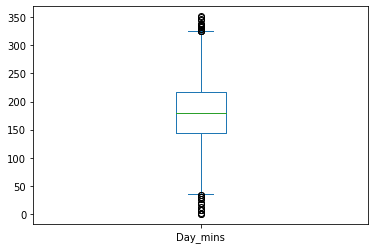

In [48]:
churn1["Day_mins"].plot(kind="box")

### Day_calls

<AxesSubplot:>

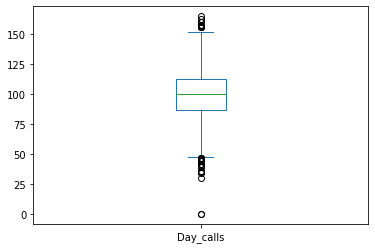

In [49]:
churn1["Day_calls"].plot(kind="box")

In [50]:
churn1["Day_calls"].value_counts()

105    116
102    113
95     108
97     104
94     102
      ... 
35       1
30       1
165      1
163      1
46       1
Name: Day_calls, Length: 123, dtype: int64

In [51]:
churn1=churn1[(churn1["Day_calls"]!=30) & (churn1["Day_calls"]!=35) & (churn1["Day_calls"]!=46) & (churn1["Day_calls"]!=163) & (churn1["Day_calls"]!=165)]

<AxesSubplot:>

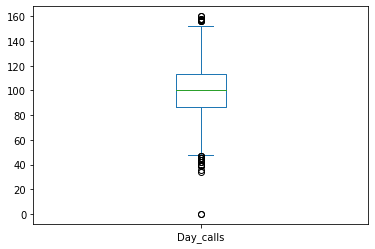

In [52]:
churn1["Day_calls"].plot(kind="box")

### Day_charge

<AxesSubplot:>

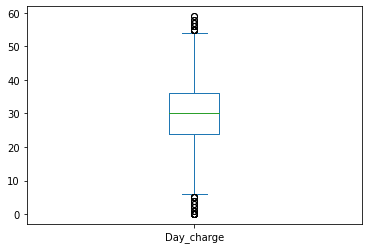

In [53]:
churn1["Day_charge"].plot(kind="box")

In [54]:
churn1["Day_charge"].value_counts()

33    221
32    220
28    217
30    215
26    215
29    213
24    196
31    195
27    194
35    193
36    190
34    183
37    174
25    166
23    158
22    151
21    141
39    135
38    135
40    125
41    109
19    106
20     98
18     83
42     78
17     73
44     69
16     69
46     68
43     64
45     57
14     51
15     46
47     40
48     38
13     37
12     26
10     26
50     22
49     22
11     19
8      18
51     18
9      16
53     11
0      10
52      9
54      8
55      8
7       7
6       6
5       5
56      4
1       4
57      3
59      2
58      2
2       2
4       2
3       2
Name: Day_charge, dtype: int64

### Eve_mins

<AxesSubplot:>

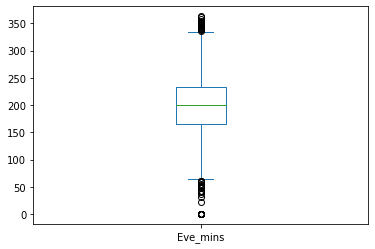

In [55]:
churn1["Eve_mins"].plot(kind="box")

In [56]:
churn1["Eve_mins"].value_counts

<bound method IndexOpsMixin.value_counts of 0       197
1       195
2       121
3        61
4       148
       ... 
4995    223
4996    256
4997    172
4998    171
4999    267
Name: Eve_mins, Length: 4975, dtype: int32>

### Eve_calls

<AxesSubplot:>

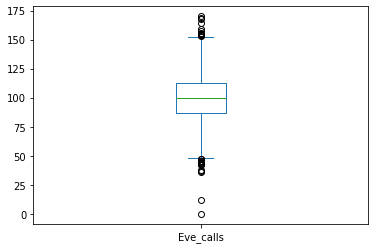

In [57]:
churn1["Eve_calls"].plot(kind="box")

In [58]:
churn1["Eve_calls"].value_counts()

105    113
97     110
91     109
103    106
94     104
      ... 
156      1
36       1
12       1
45       1
38       1
Name: Eve_calls, Length: 126, dtype: int64

In [59]:
churn1=churn1[(churn1["Eve_calls"]!=12) & (churn1["Eve_calls"]!=36) & (churn1["Eve_calls"]!=38) & (churn1["Eve_calls"]!=45) & (churn1["Eve_calls"]!=156)]

<AxesSubplot:>

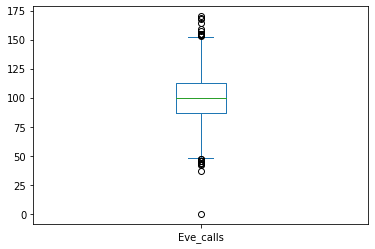

In [60]:
churn1["Eve_calls"].plot(kind="box")

### Eve_charge

<AxesSubplot:>

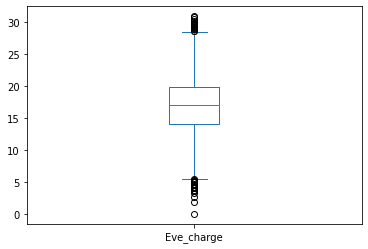

In [61]:
churn1["Eve_charge"].plot(kind="box")

In [62]:
churn1["Eve_charge"].value_counts()

14.25    15
15.90    15
16.12    14
18.79    13
18.96    13
         ..
6.62      1
6.45      1
25.64     1
21.76     1
28.93     1
Name: Eve_charge, Length: 1654, dtype: int64

In [63]:
churn1=churn1[(churn1["Eve_charge"]!=6.45) & (churn1["Eve_charge"]!=6.62) & (churn1["Eve_charge"]!=21.76) & (churn1["Eve_charge"]!=25.64) & (churn1["Eve_charge"]!=28.93)]

<AxesSubplot:>

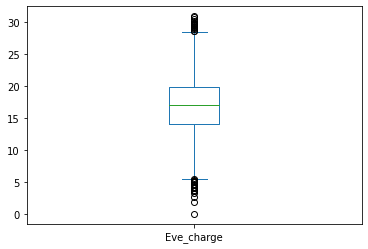

In [64]:
churn1["Eve_charge"].plot(kind="box")

### Night_mins

<AxesSubplot:>

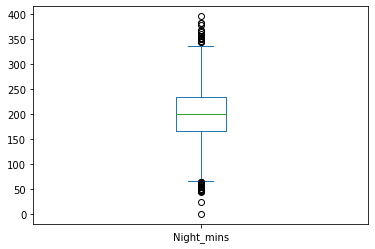

In [65]:
churn1["Night_mins"].plot(kind="box")

In [66]:
churn1["Night_mins"].value_counts()

188.2    11
194.3    11
186.2    11
208.9    10
214.6    10
         ..
165.0     1
293.9     1
78.1      1
134.9     1
224.4     1
Name: Night_mins, Length: 1848, dtype: int64

In [67]:
churn1=churn1[(churn1["Night_mins"]!=78.1) & (churn1["Night_mins"]!=134.9) & (churn1["Night_mins"]!=165.0) & (churn1["Night_mins"]!=224.4) & (churn1["Night_mins"]!=293.9)]

<AxesSubplot:>

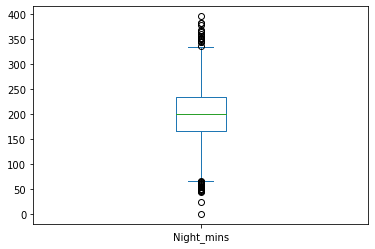

In [68]:
churn1["Night_mins"].plot(kind="box")

### Night_calls

<AxesSubplot:>

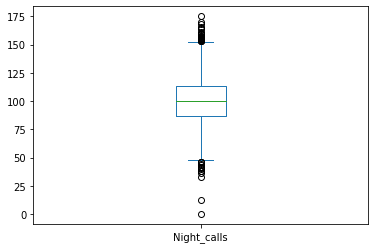

In [69]:
churn1["Night_calls"].plot(kind="box")

In [70]:
churn1["Night_calls"].value_counts()

105    118
102    108
100    107
104    105
99     105
      ... 
36       1
33       1
166      1
44       1
0        1
Name: Night_calls, Length: 131, dtype: int64

In [71]:
churn1=churn1[(churn1["Night_calls"]!=0) & (churn1["Night_calls"]!=33) & (churn1["Night_calls"]!=36) & (churn1["Night_calls"]!=44) & (churn1["Night_calls"]!=166)]

<AxesSubplot:>

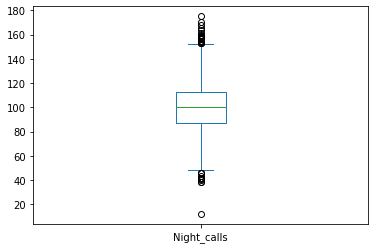

In [72]:
churn1["Night_calls"].plot(kind="box")

## Night_charge

<AxesSubplot:>

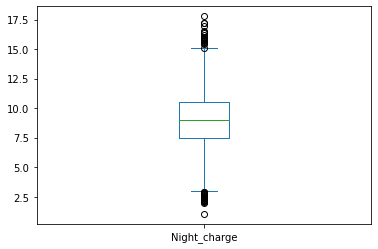

In [73]:
churn1["Night_charge"].plot(kind="box")

In [74]:
churn1["Night_charge"].value_counts()

9.66     19
8.47     19
10.26    18
8.15     18
9.40     18
         ..
13.98     1
15.49     1
5.45      1
2.45      1
3.38      1
Name: Night_charge, Length: 1024, dtype: int64

In [75]:
churn1=churn1[(churn1["Night_charge"]!=2.45) & (churn1["Night_charge"]!=3.38) & (churn1["Night_charge"]!=5.45) & (churn1["Night_charge"]!=13.98) & (churn1["Night_charge"]!=15.49)]

<AxesSubplot:>

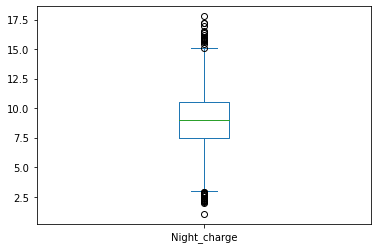

In [76]:
churn1["Night_charge"].plot(kind="box")

### Customer_calls

<AxesSubplot:>

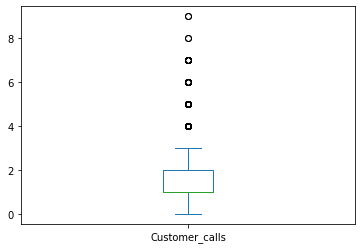

In [77]:
churn1["Customer_calls"].plot(kind="box")

In [78]:
churn1["Customer_calls"].value_counts()

1    1765
2    1119
0    1012
3     658
4     251
5      95
6      33
7      13
9       2
8       2
Name: Customer_calls, dtype: int64

In [79]:
churn1=churn1[(churn1["Customer_calls"]!=4) & (churn1["Customer_calls"]!=5) & (churn1["Customer_calls"]!=6) & (churn1["Customer_calls"]!=7) & (churn1["Customer_calls"]!=8) & (churn1["Customer_calls"]!=9)]

<AxesSubplot:>

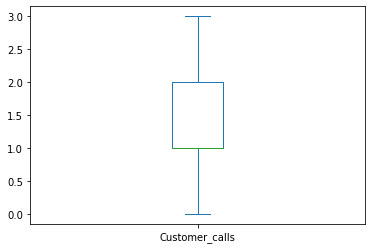

In [80]:
churn1["Customer_calls"].plot(kind="box")

### Churn

<AxesSubplot:>

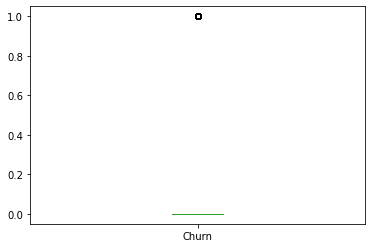

In [81]:
churn1["Churn"].plot(kind="box")

In [82]:
churn1["Churn"].value_counts()

0    4054
1     500
Name: Churn, dtype: int64

## Visualization 

### Kdeplot

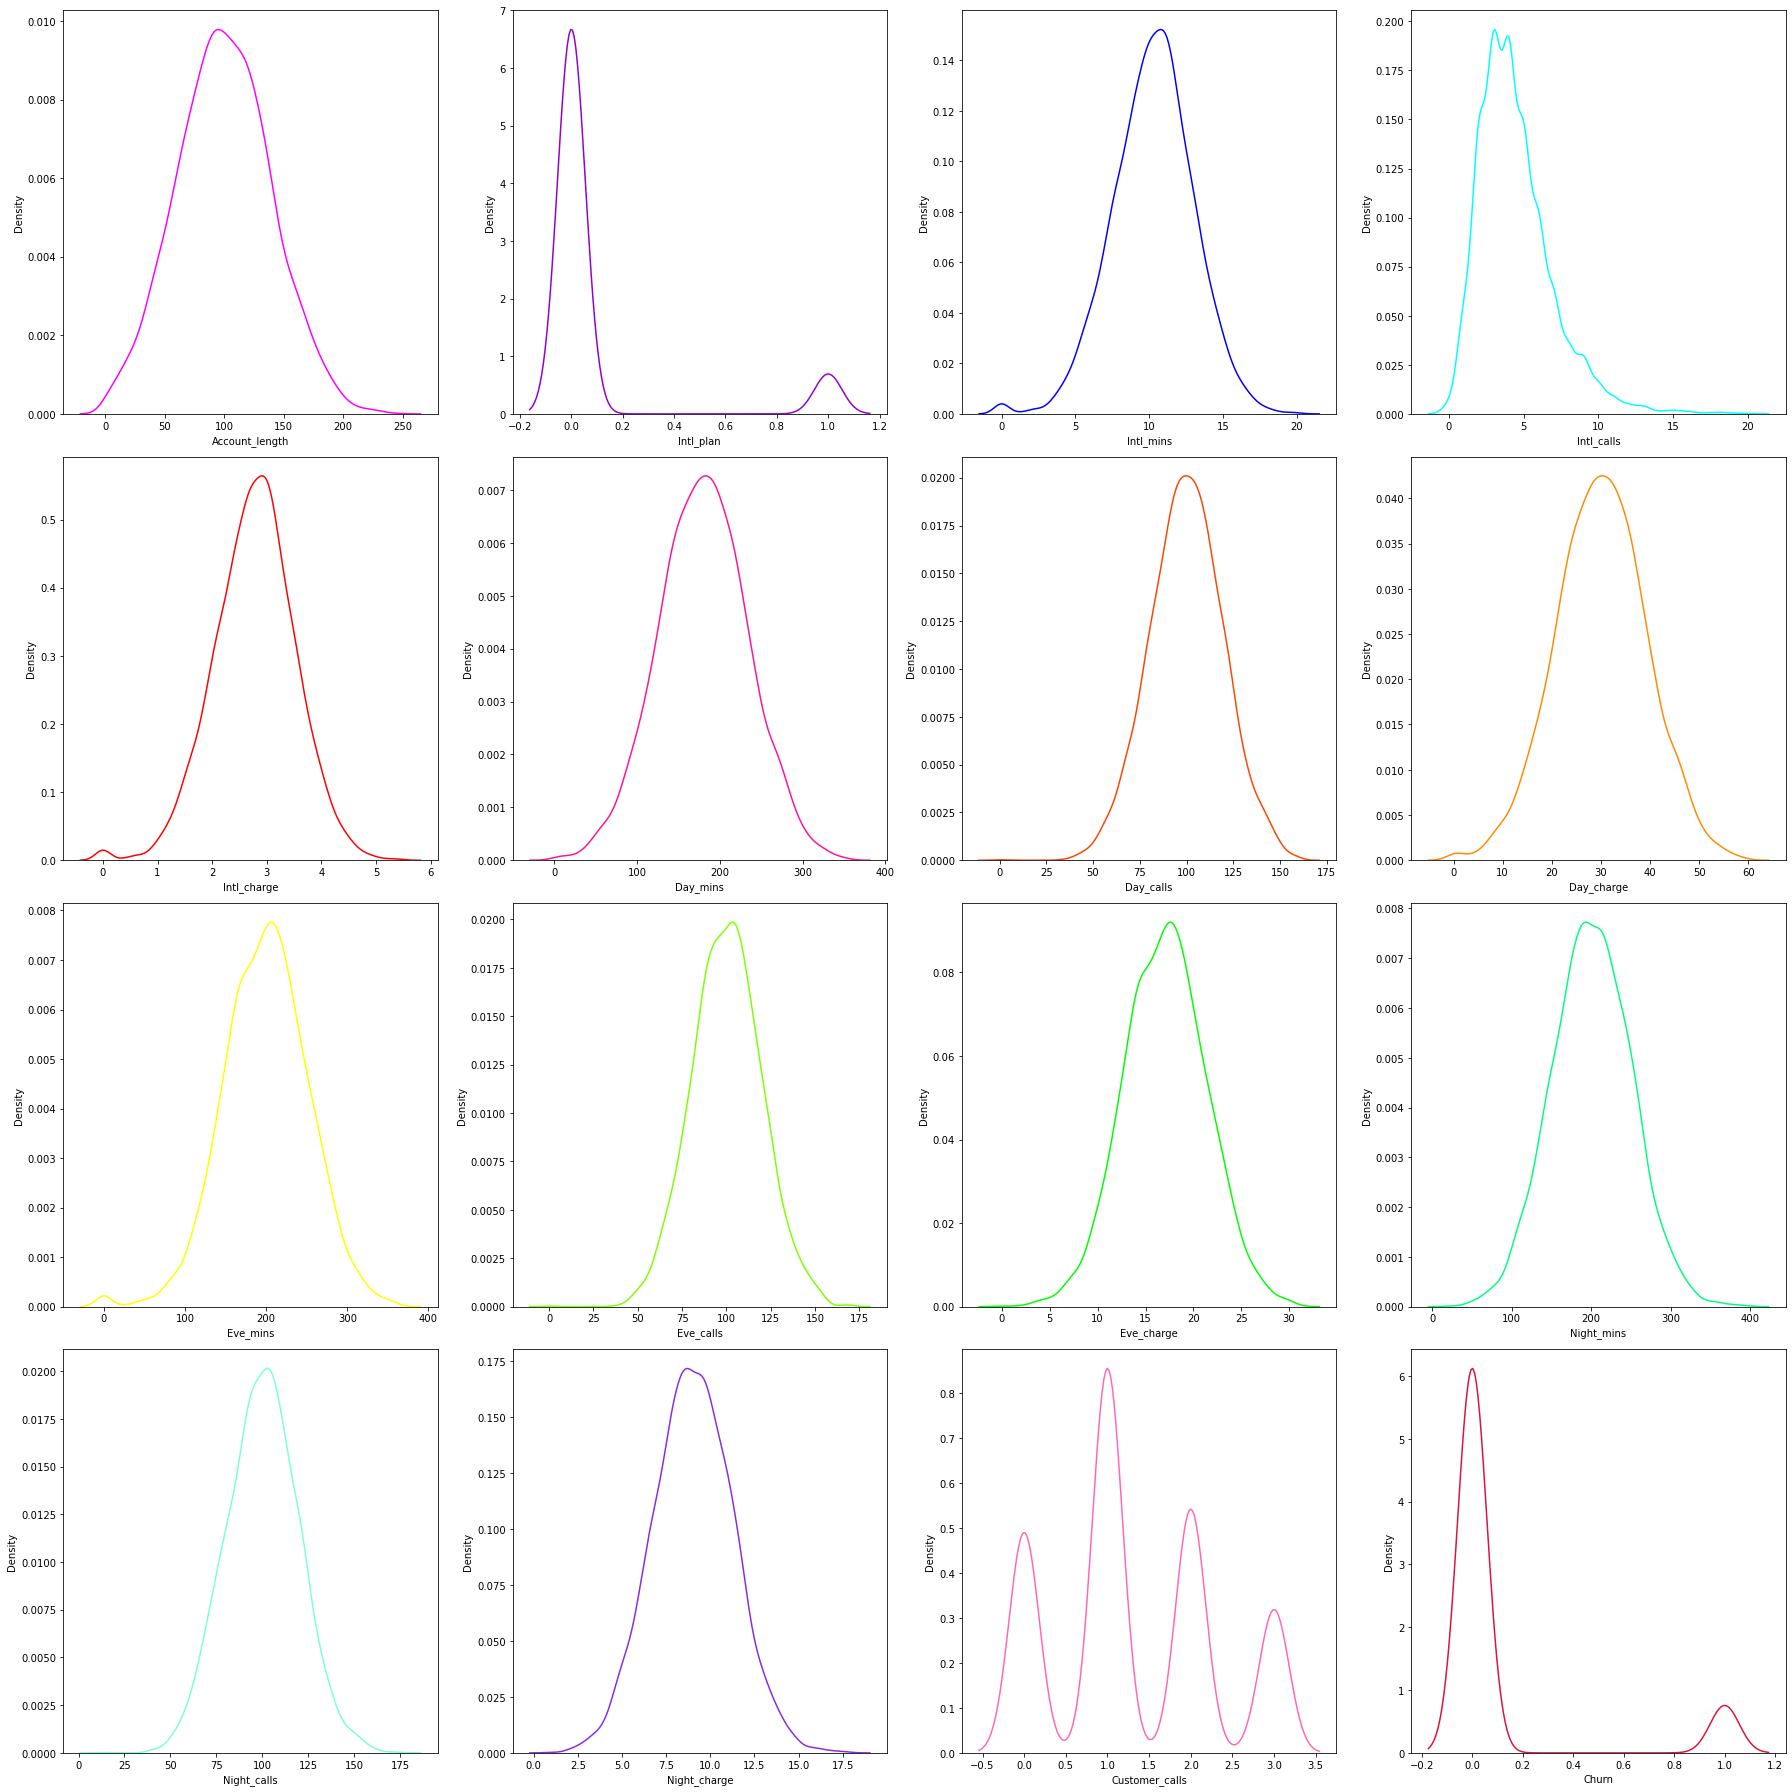

In [83]:
fig, ax = plt.subplots(4,4 ,figsize=(25,25))

sns.kdeplot(churn1["Account_length"], ax=ax[0,0], color="magenta")
sns.kdeplot(churn1["Intl_plan"], ax=ax[0,1], color="darkviolet")
sns.kdeplot(churn1["Intl_mins"], ax=ax[0,2], color="blue")
sns.kdeplot(churn1["Intl_calls"], ax=ax[0,3], color="cyan")
sns.kdeplot(churn1["Intl_charge"], ax=ax[1,0], color="red")
sns.kdeplot(churn1["Day_mins"], ax=ax[1,1], color="deeppink")
sns.kdeplot(churn1["Day_calls"], ax=ax[1,2], color="orangered")
sns.kdeplot(churn1["Day_charge"], ax=ax[1,3], color="darkorange")
sns.kdeplot(churn1["Eve_mins"], ax=ax[2,0], color="yellow")
sns.kdeplot(churn1["Eve_calls"], ax=ax[2,1], color="chartreuse")
sns.kdeplot(churn1["Eve_charge"], ax=ax[2,2], color="lime")
sns.kdeplot(churn1["Night_mins"], ax=ax[2,3], color="springgreen")
sns.kdeplot(churn1["Night_calls"], ax=ax[3,0], color="aquamarine")
sns.kdeplot(churn1["Night_charge"], ax=ax[3,1], color="blueviolet")
sns.kdeplot(churn1["Customer_calls"], ax=ax[3,2], color="hotpink")
sns.kdeplot(churn1["Churn"], ax=ax[3,3], color="crimson")

plt.tight_layout()
plt.show()

### Distplot

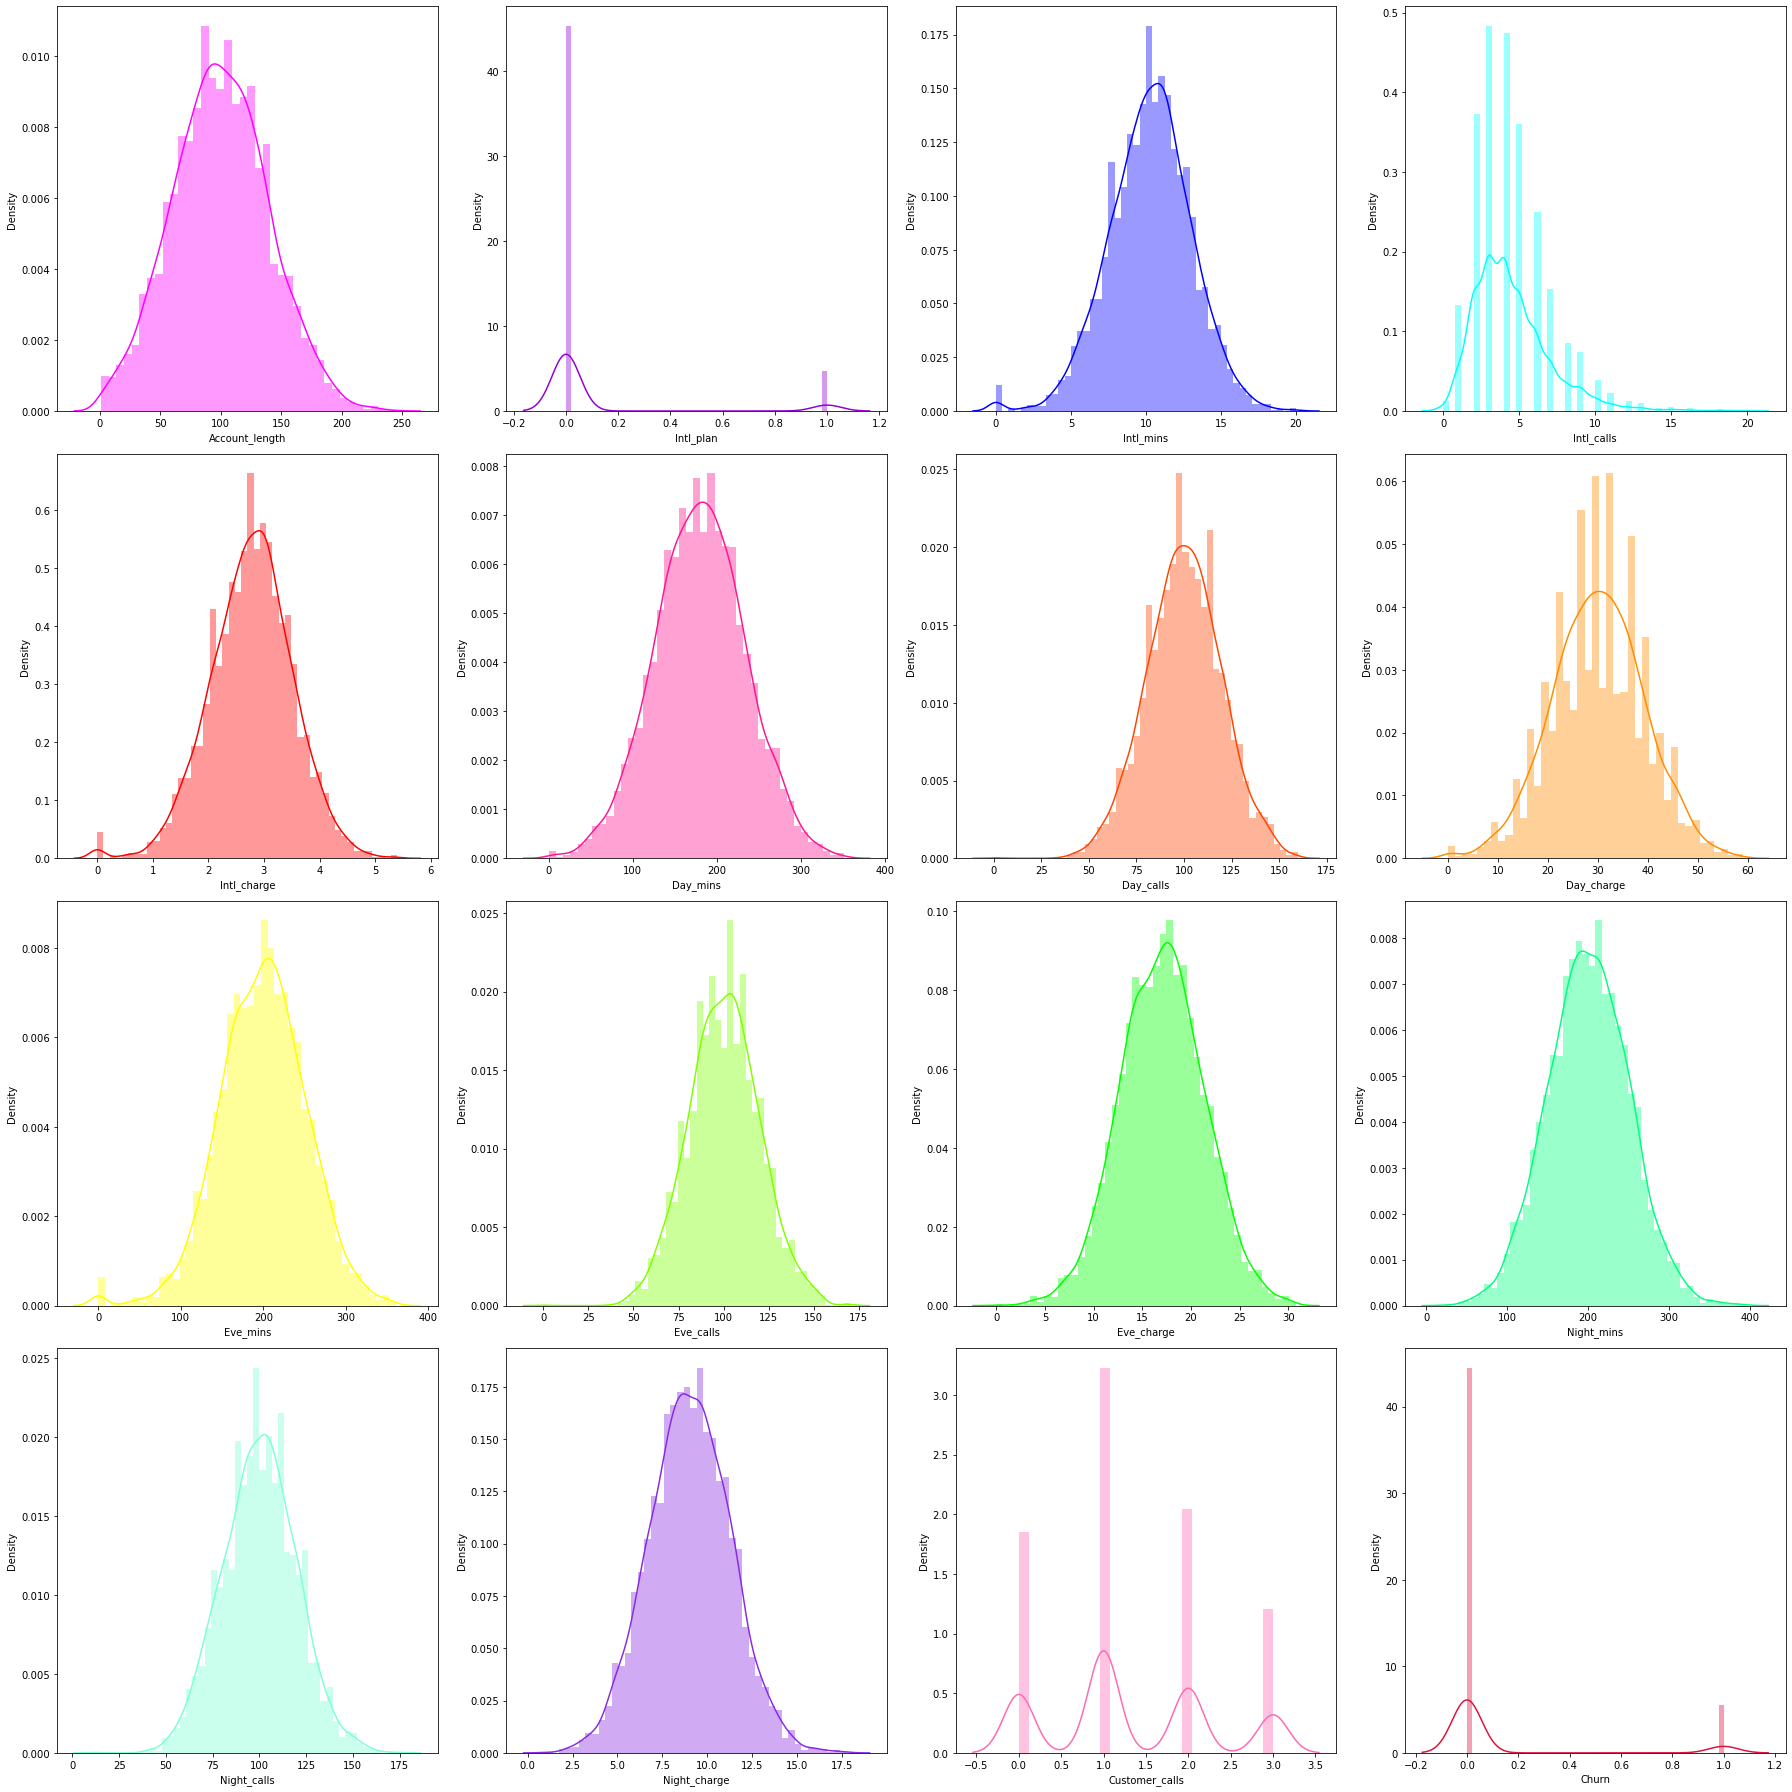

In [84]:
fig, ax = plt.subplots(4,4 ,figsize=(25,25))

sns.distplot(churn1["Account_length"], ax=ax[0,0], color="magenta")
sns.distplot(churn1["Intl_plan"], ax=ax[0,1], color="darkviolet")
sns.distplot(churn1["Intl_mins"], ax=ax[0,2], color="blue")
sns.distplot(churn1["Intl_calls"], ax=ax[0,3], color="cyan")
sns.distplot(churn1["Intl_charge"], ax=ax[1,0], color="red")
sns.distplot(churn1["Day_mins"], ax=ax[1,1], color="deeppink")
sns.distplot(churn1["Day_calls"], ax=ax[1,2], color="orangered")
sns.distplot(churn1["Day_charge"], ax=ax[1,3], color="darkorange")
sns.distplot(churn1["Eve_mins"], ax=ax[2,0], color="yellow")
sns.distplot(churn1["Eve_calls"], ax=ax[2,1], color="chartreuse")
sns.distplot(churn1["Eve_charge"], ax=ax[2,2], color="lime")
sns.distplot(churn1["Night_mins"], ax=ax[2,3], color="springgreen")
sns.distplot(churn1["Night_calls"], ax=ax[3,0], color="aquamarine")
sns.distplot(churn1["Night_charge"], ax=ax[3,1], color="blueviolet")
sns.distplot(churn1["Customer_calls"], ax=ax[3,2], color="hotpink")
sns.distplot(churn1["Churn"], ax=ax[3,3], color="crimson")

plt.tight_layout()
plt.show()

### Histplot

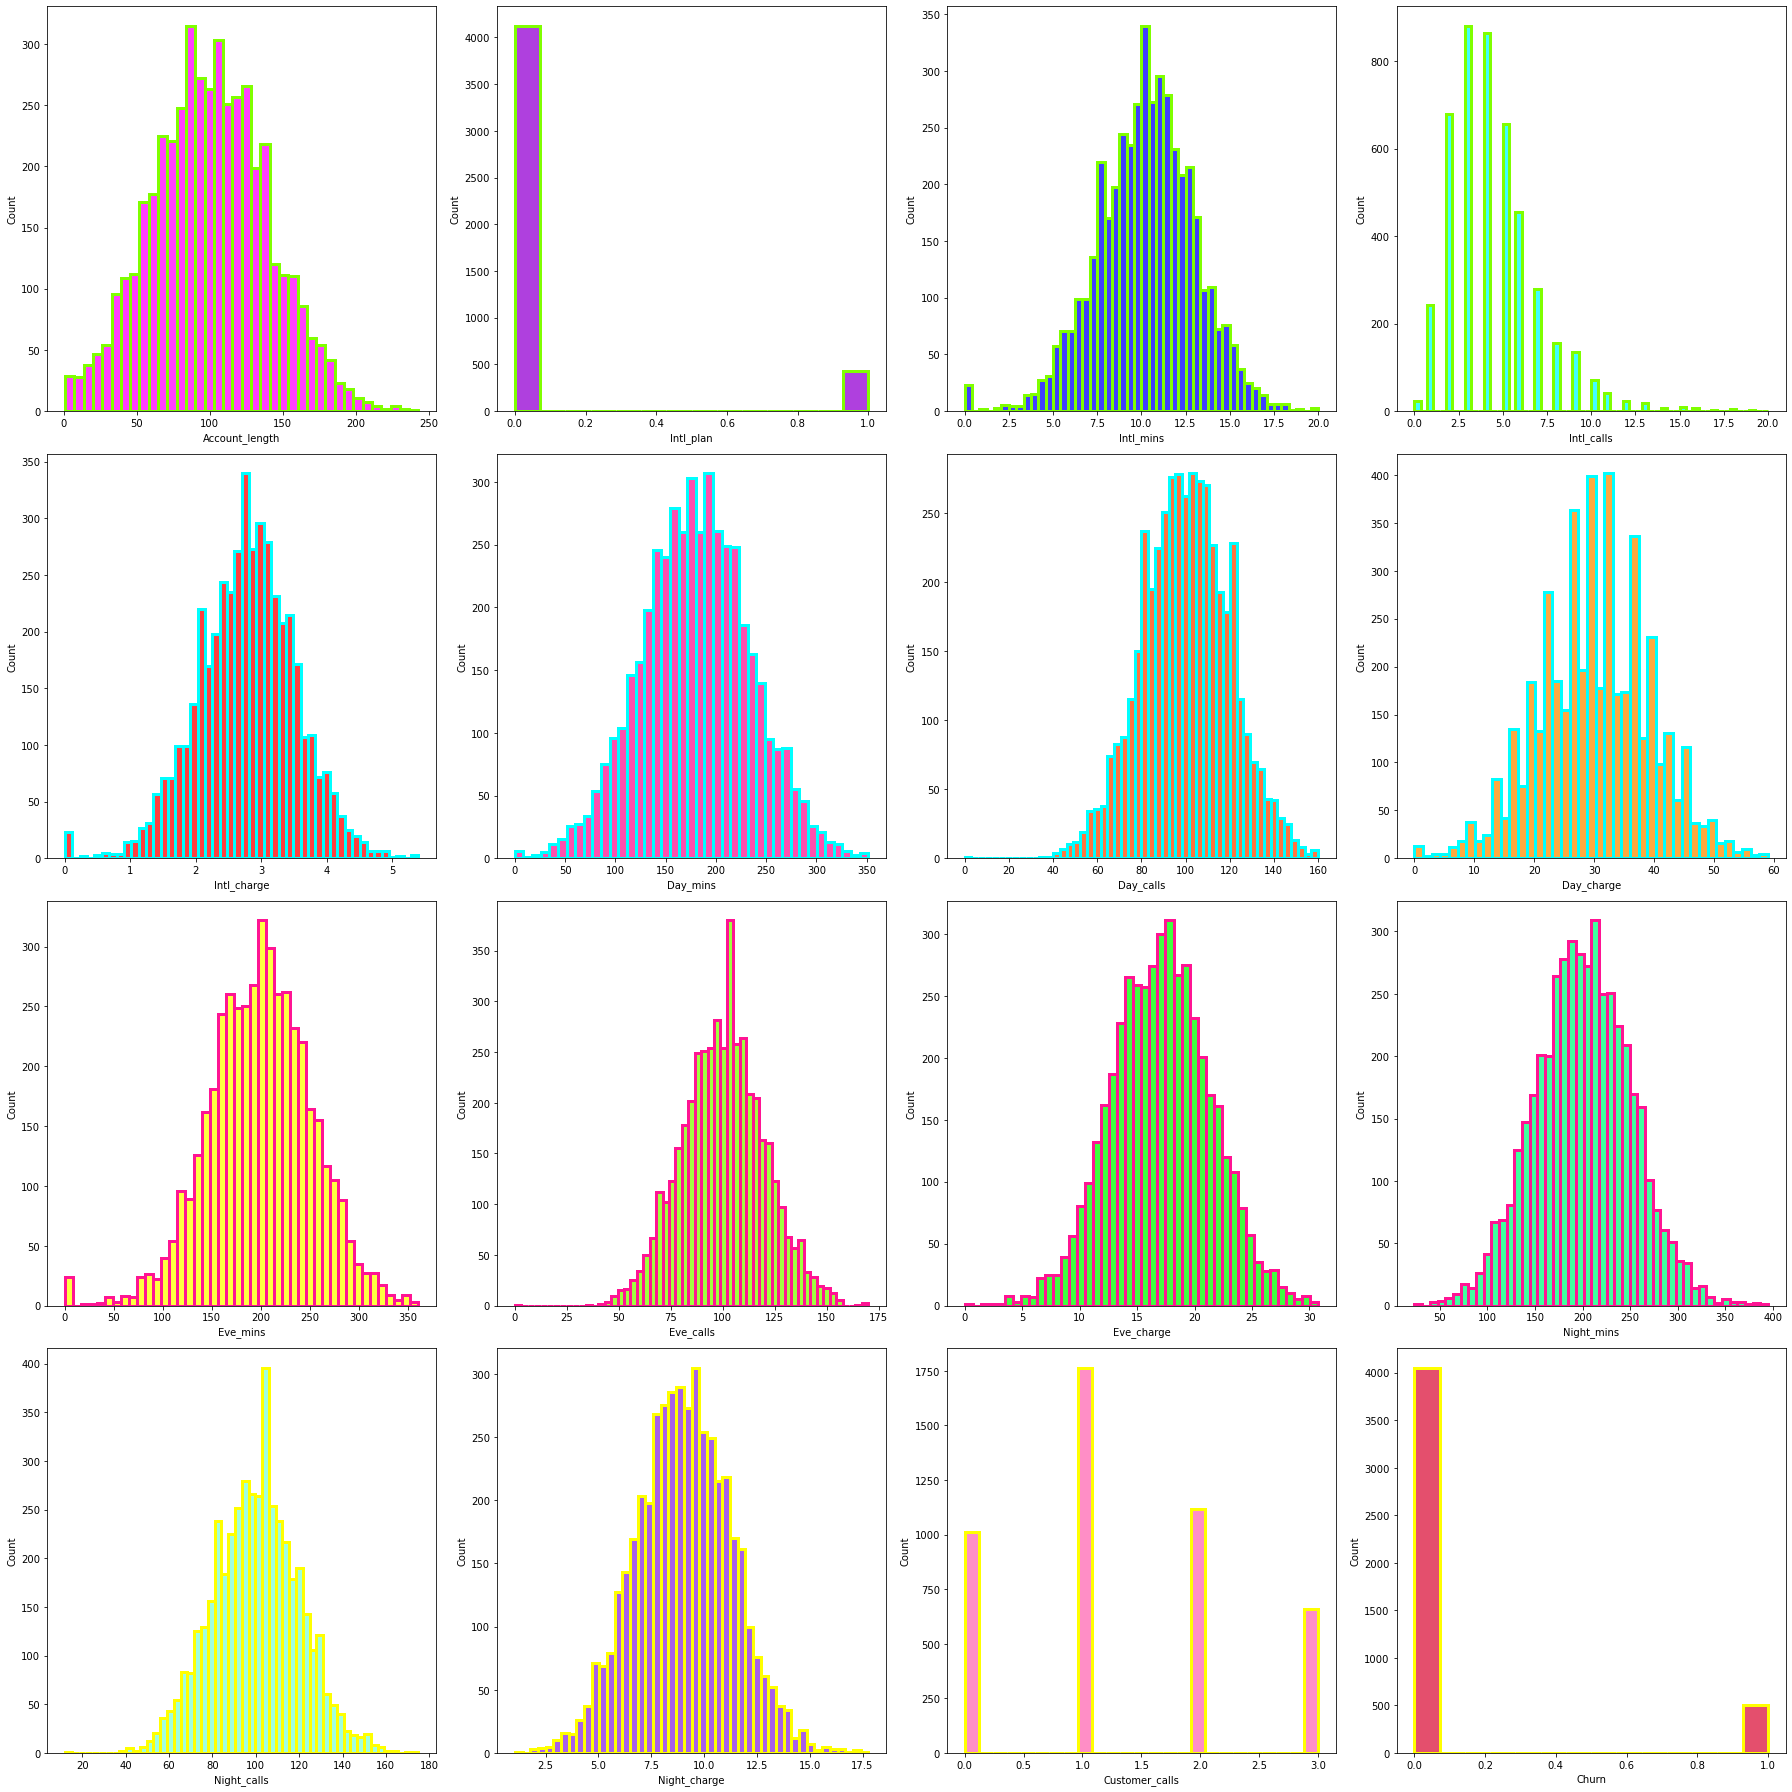

In [85]:
fig, ax = plt.subplots(4,4 ,figsize=(25,25))

sns.histplot(churn1["Account_length"], ax=ax[0,0], color="magenta",linewidth=3,edgecolor="chartreuse")
sns.histplot(churn1["Intl_plan"], ax=ax[0,1], color="darkviolet",linewidth=3,edgecolor="chartreuse")
sns.histplot(churn1["Intl_mins"], ax=ax[0,2], color="blue",linewidth=3,edgecolor="chartreuse")
sns.histplot(churn1["Intl_calls"], ax=ax[0,3], color="cyan",linewidth=3,edgecolor="chartreuse")
sns.histplot(churn1["Intl_charge"], ax=ax[1,0], color="red",linewidth=3,edgecolor="cyan")
sns.histplot(churn1["Day_mins"], ax=ax[1,1], color="deeppink",linewidth=3,edgecolor="cyan")
sns.histplot(churn1["Day_calls"], ax=ax[1,2], color="orangered",linewidth=3,edgecolor="cyan")
sns.histplot(churn1["Day_charge"], ax=ax[1,3], color="darkorange",linewidth=3,edgecolor="cyan")
sns.histplot(churn1["Eve_mins"], ax=ax[2,0], color="yellow",linewidth=3,edgecolor="deeppink")
sns.histplot(churn1["Eve_calls"], ax=ax[2,1], color="chartreuse",linewidth=3,edgecolor="deeppink")
sns.histplot(churn1["Eve_charge"], ax=ax[2,2], color="lime",linewidth=3,edgecolor="deeppink")
sns.histplot(churn1["Night_mins"], ax=ax[2,3], color="springgreen",linewidth=3,edgecolor="deeppink")
sns.histplot(churn1["Night_calls"], ax=ax[3,0], color="aquamarine",linewidth=3,edgecolor="yellow")
sns.histplot(churn1["Night_charge"], ax=ax[3,1], color="blueviolet",linewidth=3,edgecolor="yellow")
sns.histplot(churn1["Customer_calls"], ax=ax[3,2], color="hotpink",linewidth=3,edgecolor="yellow")
sns.histplot(churn1["Churn"], ax=ax[3,3], color="crimson",linewidth=3,edgecolor="yellow")

plt.tight_layout()
plt.show()

## Split the data into dependent and independent data

In [86]:
x=churn1.drop("Churn",axis=1)
y=churn1["Churn"]

## Balancing data

In [87]:
from collections import Counter

In [88]:
print("Independent before resample",format(Counter(x)))
print("Dependent before resample", format(Counter(y)))

Independent before resample Counter({'Account_length': 1, 'Intl_plan': 1, 'Intl_mins': 1, 'Intl_calls': 1, 'Intl_charge': 1, 'Day_mins': 1, 'Day_calls': 1, 'Day_charge': 1, 'Eve_mins': 1, 'Eve_calls': 1, 'Eve_charge': 1, 'Night_mins': 1, 'Night_calls': 1, 'Night_charge': 1, 'Customer_calls': 1})
Dependent before resample Counter({0: 4054, 1: 500})


### SMOTE

In [89]:
from imblearn.over_sampling import SMOTE

In [90]:
sm=SMOTE(random_state=0)
x_ros,y_ros=sm.fit_resample(x,y)

In [91]:
print("Independent after resample",format(Counter(x_ros)))
print("Dependent after resample",format(Counter(y_ros)))

Independent after resample Counter({'Account_length': 1, 'Intl_plan': 1, 'Intl_mins': 1, 'Intl_calls': 1, 'Intl_charge': 1, 'Day_mins': 1, 'Day_calls': 1, 'Day_charge': 1, 'Eve_mins': 1, 'Eve_calls': 1, 'Eve_charge': 1, 'Night_mins': 1, 'Night_calls': 1, 'Night_charge': 1, 'Customer_calls': 1})
Dependent after resample Counter({0: 4054, 1: 4054})


In [92]:
x_ros.shape,y_ros.shape

((8108, 15), (8108,))

### Split the data into Independent and Dependent target

In [93]:
from sklearn.model_selection import train_test_split

In [94]:
x_train,x_test,y_train,y_test=train_test_split(x_ros,y_ros,test_size=.20,random_state=0)

# Model  Building

## Logistic Regression

In [95]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [96]:
Lg=LogisticRegression(random_state=0)
lgmodel=Lg.fit(x_train,y_train)

## Train

In [97]:
y_train_pred=lgmodel.predict(x_train)

#### RESULTS

In [98]:
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.76      0.74      0.75      3254
           1       0.74      0.76      0.75      3232

    accuracy                           0.75      6486
   macro avg       0.75      0.75      0.75      6486
weighted avg       0.75      0.75      0.75      6486



In [99]:
print(confusion_matrix(y_train,y_train_pred))

[[2406  848]
 [ 761 2471]]


In [100]:
print("Accuracy:",accuracy_score(y_train,y_train_pred))

Accuracy: 0.751927227875424


## Test

In [101]:
y_test_pred=lgmodel.predict(x_test)

#### RESULTS

In [102]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.75      0.72      0.73       800
           1       0.74      0.76      0.75       822

    accuracy                           0.74      1622
   macro avg       0.74      0.74      0.74      1622
weighted avg       0.74      0.74      0.74      1622



In [103]:
print(confusion_matrix(y_test,y_test_pred))

[[577 223]
 [196 626]]


In [104]:
print("Accuracy:",accuracy_score(y_test,y_test_pred))

Accuracy: 0.7416769420468557


### FINAL LOGISTIC REGRESSION RESULT

In [194]:
Logtrain_accuracy=[]
Logtest_accuracy=[]
Logtrain_accuracy.append(lgmodel.score(x_train,y_train)*100)
Logtest_accuracy.append(lgmodel.score(x_test,y_test)*100)

In [195]:
table=pd.DataFrame({"Train_acc":Logtrain_accuracy,"Test_acc":Logtest_accuracy})
table

,Train_acc,Test_acc
0,75.192723,74.167694


#### Train data have best accuracy

### AUC and ROC Curve

In [107]:
from sklearn.metrics import roc_auc_score, roc_curve

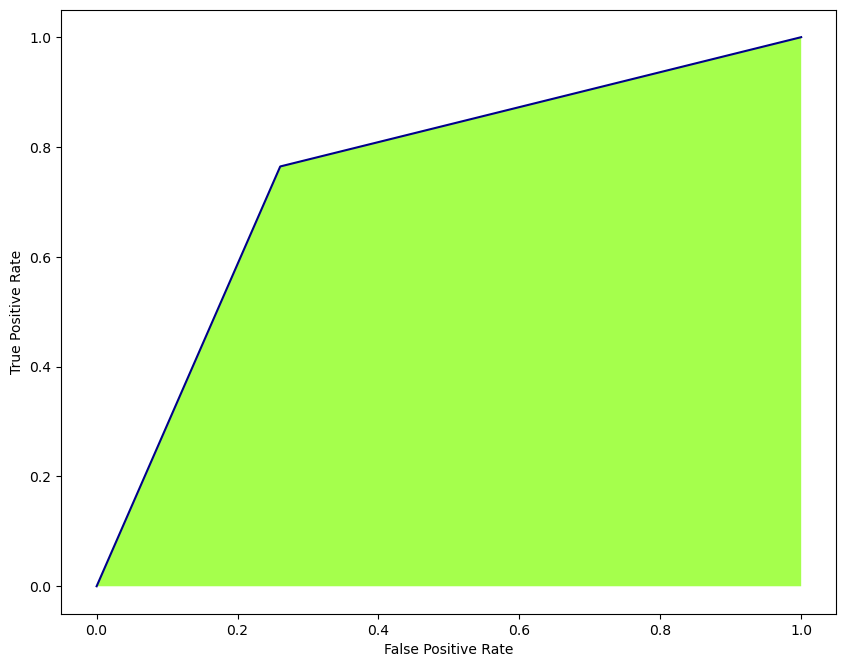

In [108]:
auc= roc_auc_score(y_train,y_train_pred)

false_positive_rate, true_positive_rate, thresolds = roc_curve(y_train,y_train_pred)

plt.figure(figsize=(10,8),dpi=100)
plt.plot(false_positive_rate, true_positive_rate, "darkblue")
plt.fill_between(false_positive_rate, true_positive_rate, facecolor="chartreuse",alpha=0.7)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

# Random Forest

In [109]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold

### model validation technique - k-fold cross validation 

In [110]:
kfold=KFold(n_splits=10,random_state=42,shuffle=True)

In [111]:
krfmodel=RandomForestClassifier(n_estimators=10,max_features=3)

#### Evaluating the cross validation scorewhile fitting the model to the validation fold

In [112]:
from sklearn.model_selection import cross_val_score

In [113]:
result=cross_val_score(krfmodel,x_ros,y_ros,cv=kfold)
print(result.mean())

0.9192173965992299


### Random Forest using train test data set

In [114]:
rdf=RandomForestClassifier(n_estimators=10,max_features=3,criterion="entropy")
rdfmodel=rdf.fit(x_train,y_train)

### Train

In [115]:
y_train_pred=rdfmodel.predict(x_train)

#### Results

In [116]:
confusion_matrix(y_train,y_train_pred)

array([[3251,    3],
       [  18, 3214]], dtype=int64)

<AxesSubplot:>

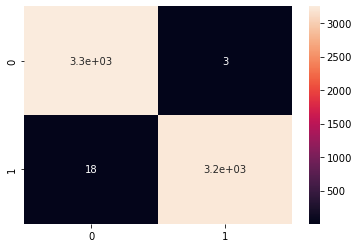

In [117]:
sns.heatmap(confusion_matrix(y_train,y_train_pred),annot=True)

In [118]:
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      3254
           1       1.00      0.99      1.00      3232

    accuracy                           1.00      6486
   macro avg       1.00      1.00      1.00      6486
weighted avg       1.00      1.00      1.00      6486



In [119]:
print(accuracy_score(y_train,y_train_pred)*100)

99.67622571692877


### Test

In [120]:
y_test_pred=rdfmodel.predict(x_test)

#### Results

In [121]:
confusion_matrix(y_test,y_test_pred)

array([[743,  57],
       [ 79, 743]], dtype=int64)

In [122]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.90      0.93      0.92       800
           1       0.93      0.90      0.92       822

    accuracy                           0.92      1622
   macro avg       0.92      0.92      0.92      1622
weighted avg       0.92      0.92      0.92      1622



In [123]:
print(accuracy_score(y_test,y_test_pred)*100)

91.61528976572133


## Final Random forest Result

In [196]:
kacc=[]
trainacc=[]
testacc=[]

kacc.append(result.mean()*100)
trainacc.append(rdfmodel.score(x_train,y_train)*100)
testacc.append(rdfmodel.score(x_test,y_test)*100)

### Visualization

In [125]:
table=pd.DataFrame({"`K-Fold":kacc,"Train":trainacc,"Test":testacc})
table

,`K-Fold,Train,Test
0,91.92174,99.676226,91.61529


#### Identifying the important features that contributes to the output and sorting it in ascending order

In [126]:
feature_imp=pd.Series(rdfmodel.feature_importances_,index=x_ros.columns).sort_values(ascending=False)
feature_imp

Day_mins          0.187275
Day_charge        0.109194
Eve_charge        0.081579
Eve_mins          0.063813
Intl_charge       0.058844
Intl_mins         0.056349
Night_mins        0.055141
Intl_plan         0.054600
Intl_calls        0.053741
Night_charge      0.053686
Eve_calls         0.053627
Account_length    0.052361
Night_calls       0.046370
Day_calls         0.044401
Customer_calls    0.029017
dtype: float64

#### Using bar plot to show important features

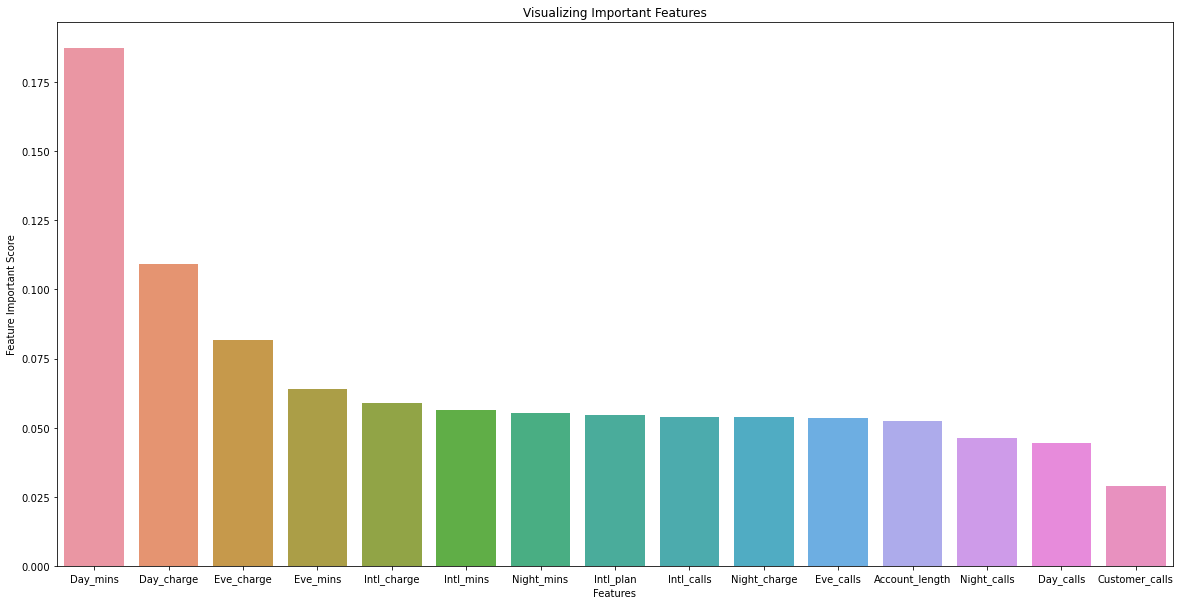

In [127]:
plt.figure(figsize=(20,10))
sns.barplot(x=feature_imp.index,y=feature_imp)
plt.xlabel("Features")
plt.ylabel("Feature Important Score")
plt.title("Visualizing Important Features")
plt.show()

## Decision Tree

In [128]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [129]:
dtc1=DecisionTreeClassifier(criterion="gini",max_depth=3)
dtc1model=dtc1.fit(x_train,y_train)

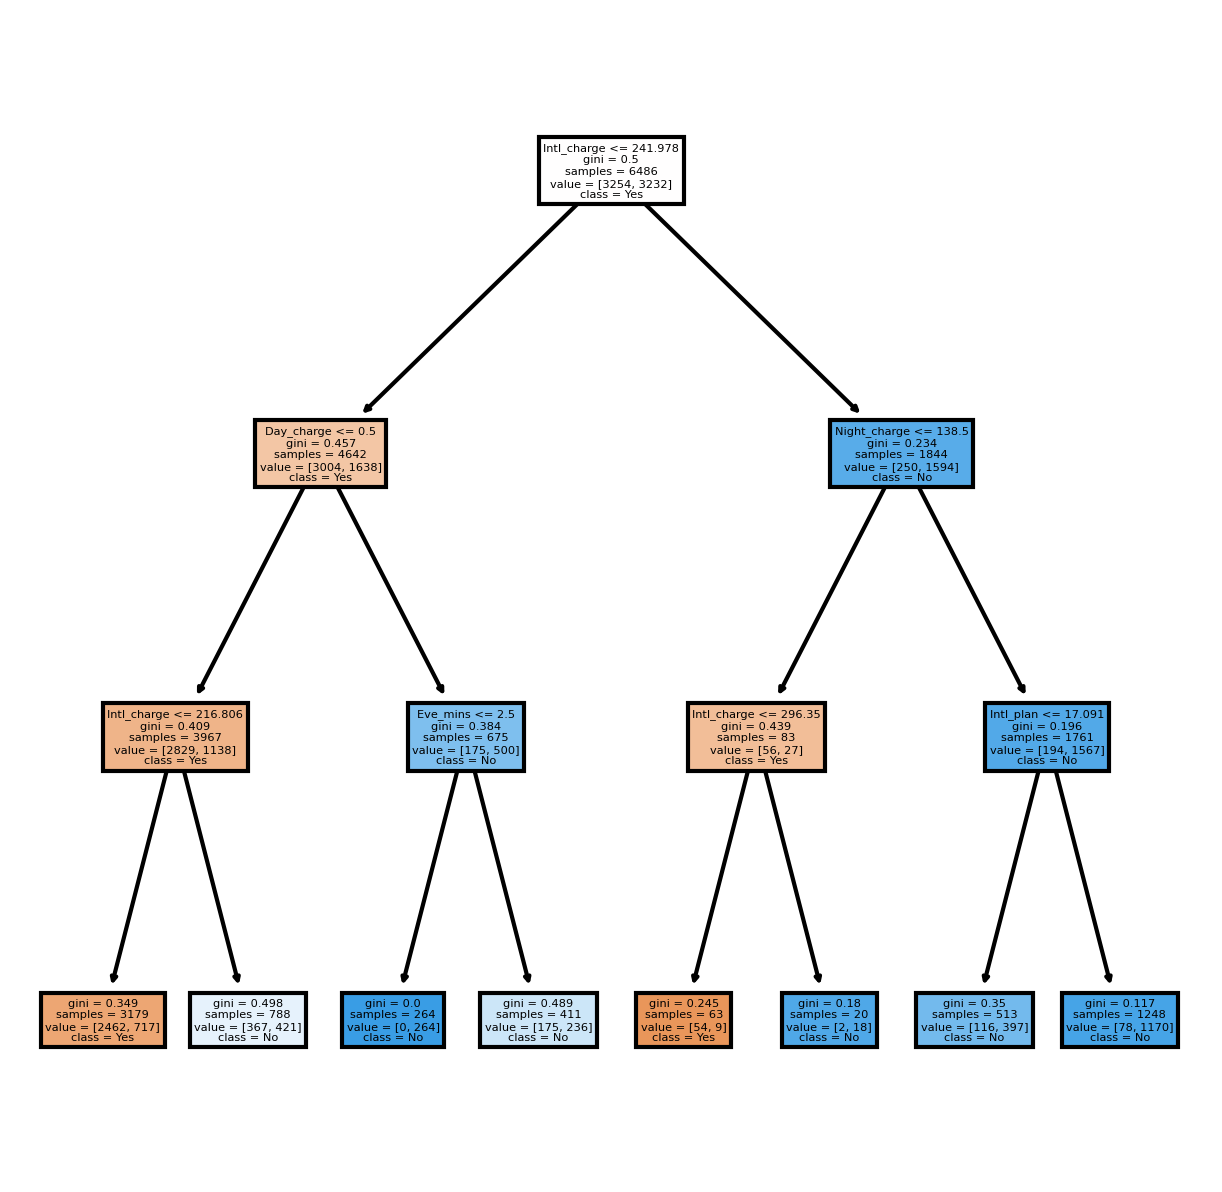

In [130]:
fn=["Day_mins","Day_charge","Eve_charge","Eve_mins","Intl_,mins","Intl_charge","Account_length","Night_mins","Night_charge","Intl_calls","Intl_plan","Eve_calls","Night_calls","Day_calls","Customer_calls","Churn"]
cn=["Yes","No"]
fig,axes=plt.subplots( figsize= (5,5),dpi=300)
tree.plot_tree(dtc1model, feature_names=fn, class_names=cn, filled=True);

### Train

In [131]:
y_train_pred=dtc1model.predict(x_train)

### Results

In [132]:
cm=confusion_matrix(y_train,y_train_pred)
cm

array([[2516,  738],
       [ 726, 2506]], dtype=int64)

<AxesSubplot:>

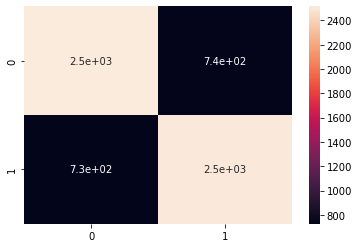

In [133]:
sns.heatmap(cm, annot=True)

In [134]:
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.78      0.77      0.77      3254
           1       0.77      0.78      0.77      3232

    accuracy                           0.77      6486
   macro avg       0.77      0.77      0.77      6486
weighted avg       0.77      0.77      0.77      6486



In [135]:
dTrainacc= accuracy_score(y_train,y_train_pred)*100
print("Accuracy:",dTrainacc)

Accuracy: 77.42830712303423


### Test

In [136]:
y_test_pred=dtc1model.predict(x_test)

#### Results

In [137]:
cm=confusion_matrix(y_test,y_test_pred)
cm

array([[603, 197],
       [191, 631]], dtype=int64)

<AxesSubplot:>

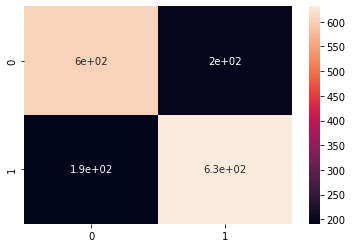

In [138]:
sns.heatmap(cm,annot=True)

In [139]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.76      0.75      0.76       800
           1       0.76      0.77      0.76       822

    accuracy                           0.76      1622
   macro avg       0.76      0.76      0.76      1622
weighted avg       0.76      0.76      0.76      1622



In [140]:
dTestacc=accuracy_score(y_test,y_test_pred)*100
print("Accuracy",dTestacc)

Accuracy 76.07891491985204


### Final Decision Tree Result

In [199]:
Dtrainacc=[]
Dtestacc=[]
Dtrainacc.append(dtc1model.score(x_train,y_train)*100)
Dtestacc.append(dtc1model.score(x_test,y_test)*100)

In [201]:
table=pd.DataFrame({"Dtrainacc":Dtrainacc,"Dtestacc":Dtestacc})
table

,Dtrainacc,Dtestacc
0,77.428307,76.078915


## Naive Bayes

### Gaussian 

In [143]:
from sklearn.naive_bayes import GaussianNB

In [144]:
gnb=GaussianNB()
gnbmodel=gnb.fit(x_train,y_train)

### Train

In [145]:
y_train_pred=gnbmodel.predict(x_train)

#### Results

In [146]:
cm=confusion_matrix(y_train,y_train_pred)
cm

array([[2572,  682],
       [ 676, 2556]], dtype=int64)

<AxesSubplot:>

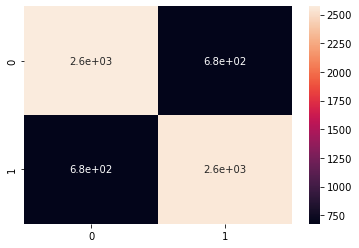

In [147]:
sns.heatmap(cm,annot=True)

In [148]:
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79      3254
           1       0.79      0.79      0.79      3232

    accuracy                           0.79      6486
   macro avg       0.79      0.79      0.79      6486
weighted avg       0.79      0.79      0.79      6486



In [149]:
gnbtrainacc=accuracy_score(y_train,y_train_pred)*100
print("Accuracy:",gnbtrainacc)

Accuracy: 79.06259636139377


### Test 

In [150]:
y_test_pred=gnbmodel.predict(x_test)

#### Results

In [151]:
cm=confusion_matrix(y_test,y_test_pred)
cm

array([[610, 190],
       [175, 647]], dtype=int64)

<AxesSubplot:>

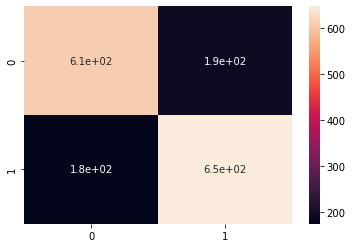

In [152]:
sns.heatmap(cm,annot=True)

In [153]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.78      0.76      0.77       800
           1       0.77      0.79      0.78       822

    accuracy                           0.77      1622
   macro avg       0.78      0.77      0.77      1622
weighted avg       0.78      0.77      0.77      1622



In [154]:
gnbtestacc=accuracy_score(y_test,y_test_pred)*100
print('Accuracy:',gnbtestacc)

Accuracy: 77.49691738594328


### BernoulliNB

In [155]:
from sklearn.naive_bayes import BernoulliNB

In [156]:
bnb=BernoulliNB()
bnbmodel=bnb.fit(x_train,y_train)

#### Train

In [157]:
y_train_pred=bnbmodel.predict(x_train)

#### Results

In [158]:
cm=confusion_matrix(y_train,y_train_pred)
cm

array([[2418,  836],
       [1834, 1398]], dtype=int64)

<AxesSubplot:>

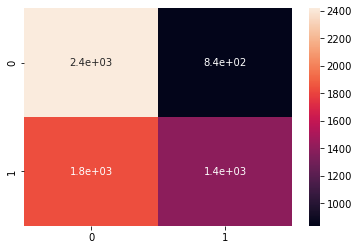

In [159]:
sns.heatmap(cm,annot=True)

In [160]:
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.57      0.74      0.64      3254
           1       0.63      0.43      0.51      3232

    accuracy                           0.59      6486
   macro avg       0.60      0.59      0.58      6486
weighted avg       0.60      0.59      0.58      6486



In [161]:
bnbtrainacc=accuracy_score(y_train,y_train_pred)*100
print("Accuracy",bnbtrainacc)

Accuracy 58.83441258094357


#### Test

In [162]:
y_test_pred=bnbmodel.predict(x_test)

#### Results

In [163]:
cm=confusion_matrix(y_test,y_test_pred)
cm

array([[563, 237],
       [480, 342]], dtype=int64)

<AxesSubplot:>

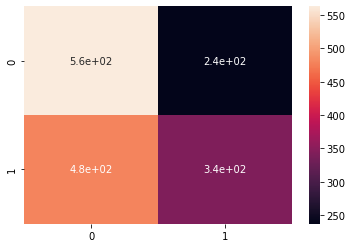

In [164]:
sns.heatmap(cm,annot=True)

In [165]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.54      0.70      0.61       800
           1       0.59      0.42      0.49       822

    accuracy                           0.56      1622
   macro avg       0.57      0.56      0.55      1622
weighted avg       0.57      0.56      0.55      1622



In [166]:
bnbtestacc=accuracy_score(y_test,y_test_pred)*100
print("Accuracy:",bnbtestacc)

Accuracy: 55.795314426633794


### Final result

In [202]:
Gnbtrainacc=[]
Gnbtestacc=[]
Bnbtrainacc=[]
Bnbtestacc=[]

Gnbtrainacc.append(gnbmodel.score(x_train,y_train)*100)
Gnbtestacc.append(gnbmodel.score(x_test,y_test)*100)
Bnbtrainacc.append(bnbmodel.score(x_train,y_train)*100)
Bnbtestacc.append(bnbmodel.score(x_test,y_test)*100)

In [209]:
table=pd.DataFrame({"Naive Bayes":["GaussianNB","BernoulliNB"],
                    "Train Accuracy":[Gnbtrainacc,Bnbtrainacc],
                    "Test Accuracy":[Gnbtestacc,Bnbtestacc]})
                   
table

,Naive Bayes,Train Accuracy,Test Accuracy
0,GaussianNB,[79.06259636139377],[77.49691738594328]
1,BernoulliNB,[58.83441258094357],[55.795314426633794]


## XGBOOST

In [169]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [170]:
import xgboost as xgb

In [171]:
xgb=xgb.XGBClassifier()
xgbmodel=xgb.fit(x_train,y_train)

#### Train

In [172]:
y_train_pred=xgbmodel.predict(x_train)

#### Results

In [173]:
cm=confusion_matrix(y_train,y_train_pred)
cm

array([[3248,    6],
       [  15, 3217]], dtype=int64)

<AxesSubplot:>

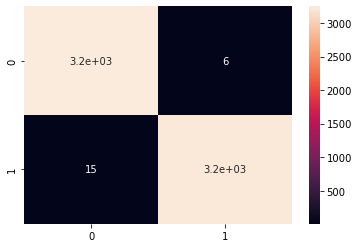

In [174]:
sns.heatmap(cm, annot=True)

In [175]:
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3254
           1       1.00      1.00      1.00      3232

    accuracy                           1.00      6486
   macro avg       1.00      1.00      1.00      6486
weighted avg       1.00      1.00      1.00      6486



In [176]:
xgbtrainacc=accuracy_score(y_train,y_train_pred)*100
print("Accuracy:",xgbtrainacc)

Accuracy: 99.67622571692877


#### Test

In [177]:
y_test_pred=xgbmodel.predict(x_test)

### Result

In [178]:
cm=confusion_matrix(y_test,y_test_pred)
cm

array([[745,  55],
       [ 65, 757]], dtype=int64)

<AxesSubplot:>

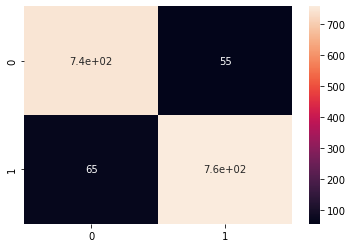

In [179]:
sns.heatmap(cm,annot=True)

In [180]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.92      0.93      0.93       800
           1       0.93      0.92      0.93       822

    accuracy                           0.93      1622
   macro avg       0.93      0.93      0.93      1622
weighted avg       0.93      0.93      0.93      1622



In [188]:
xgbtestacc=accuracy_score(y_test,y_test_pred)*100
print("Accuracy:",xgbtestacc)

Accuracy: 92.60172626387177


#### Final XGBoost Result

In [210]:
Xgbtrainacc=[]
Xgbtestacc=[]

Xgbtrainacc.append(xgbmodel.score(x_train,y_train)*100)
Xgbtestacc.append(xgbmodel.score(x_test,y_test)*100)

In [211]:
table=pd.DataFrame({"Model":["XGBOOST"],"TrainACC":Xgbtrainacc,"TestACC":Xgbtestacc})
table

,Model,TrainACC,TestACC
0,XGBOOST,99.676226,92.601726


### KNN Classifier

In [214]:
from sklearn.neighbors import KNeighborsClassifier

In [215]:
knn=KNeighborsClassifier(n_neighbors=5)
knnmodel=knn.fit(x_train,y_train)

#### Train

In [217]:
y_train_pred=knnmodel.predict(x_train)

#### Result

In [219]:
cm=confusion_matrix(y_train,y_train_pred)
cm

array([[2659,  595],
       [  12, 3220]], dtype=int64)

In [220]:
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       1.00      0.82      0.90      3254
           1       0.84      1.00      0.91      3232

    accuracy                           0.91      6486
   macro avg       0.92      0.91      0.91      6486
weighted avg       0.92      0.91      0.91      6486



In [222]:
print("Accuracy:",accuracy_score(y_train,y_train_pred)*100)

Accuracy: 90.6413814369411


#### Test

In [223]:
y_test_pred=knnmodel.predict(x_test)

#### Results

In [224]:
cm=confusion_matrix(y_test,y_test_pred)
cm

array([[590, 210],
       [ 14, 808]], dtype=int64)

In [225]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.98      0.74      0.84       800
           1       0.79      0.98      0.88       822

    accuracy                           0.86      1622
   macro avg       0.89      0.86      0.86      1622
weighted avg       0.88      0.86      0.86      1622



In [226]:
print("Accuracy:",accuracy_score(y_test,y_test_pred))

Accuracy: 0.8618988902589396


#### Final KNN result

In [229]:
knntrainacc=[]
knntestacc=[]

knntrainacc.append(knnmodel.score(x_train,y_train)*100)
knntestacc.append(knnmodel.score(x_test,y_test)*100)

In [230]:
table=pd.DataFrame({"train":knntrainacc,"test":knntestacc})
table

,train,test
0,90.641381,86.189889


### FINAL MODEL BUILDING RESULT

In [184]:
nil="NIL"
nil

'NIL'

In [239]:
Final_Table=pd.DataFrame({"MODELS":["Logistic Regression","K-fold","RandomForest Classifier","DecisionTree Classifier","GaussianNB","BernoulliNB","XGBoost","KNN Classifier"],
                          "Train Accuarcy":[Logtrain_accuracy,nil,trainacc,Dtrainacc,Gnbtrainacc,Bnbtrainacc,Xgbtrainacc,knntrainacc],
                          "Test Accuracy":[Logtest_accuracy,nil,testacc,Dtestacc,Gnbtestacc,Bnbtestacc,Xgbtestacc,knntestacc],
                          "x,y Accuracy":[nil,kacc,nil,nil,nil,nil,nil,nil]})

Final_Table

,MODELS,Train Accuarcy,Test Accuracy,"x,y Accuracy"
0,Logistic Regression,[75.1927227875424],[74.16769420468557],NIL
1,K-fold,NIL,NIL,[91.92173965992299]
2,RandomForest Classifier,[99.67622571692877],[91.61528976572133],NIL
3,DecisionTree Classifier,[77.42830712303423],[76.07891491985204],NIL
4,GaussianNB,[79.06259636139377],[77.49691738594328],NIL
5,BernoulliNB,[58.83441258094357],[55.795314426633794],NIL
6,XGBoost,[99.67622571692877],[92.60172626387177],NIL
7,KNN Classifier,[90.6413814369411],[86.18988902589396],NIL
